# EDA Alzheimer Disease

![Portada del informe](./img/Alzheimer_Report_Cover.png)

---

In [27]:
# Se realizan los imports de las librerías que serán utilizadas durante el EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import chi2_contingency, mannwhitneyu, ttest_ind


# Ruta del archivo donde estan las funciones e importarlo
sys.path.append(os.path.abspath('../'))
from utils.eda_functions import *

### 1. Business case & data collection

**Hipótesis iniciales**

El objetivo del EDA es observar que variables son las que más influyen en los pacientes diagnosticados de Alzheimer y hallar posibles relaciones entre ellas. Viendo el resultado, podríamos saber que se puede tener en cuenta a la hora de diagnosticar/tratar un paciente con esta enfermedad.

1. **Hipótesis 1**: ¿hay alguna tendencia en los datos demográficos en los pacientes de Alzheimer? Sobre todo podría ser la edad o, incluso nivel educacional. 

2. **Hipótesis 2**: ¿el estilo de vida influye en el desarrollo de Alzheimer?

3. **Hipótesis 3**: ¿los datos del historial médico influyen en el desarrollo de Alzheimer?

4. **Hipótesis 4**: ¿las mediciones clínicas sirven para diagnosticar la enfermedad? ¿y las evaluaciones cognitivas? 

5. **Hipótesis 5**: ¿están estos síntomas relacionados con el Alzheimer?



In [2]:
# Se carga el dataframe inicial que se ha descargado de Kaggle con la información
route = "./data/alzheimers_disease_data.csv"
df_alzheimer = pd.read_csv(route)

# Se hace una pequeña visualización del df
print("Primeras cinco líneas del dataset que corresponden con los cinco primeros pacientes.")
df_alzheimer.head()

Primeras cinco líneas del dataset que corresponden con los cinco primeros pacientes.


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


### 2. Data understanding

Análisis exploratorio inicial de las variables que hay en el dataset, el tamaño, y el resto de información básica que hay que saber previamente.

In [3]:
# Se hace una exploración inicial del df:

print(f"El dataset tiene {df_alzheimer.shape[0]} filas/pacientes y {df_alzheimer.shape[1]} columnas de información sobre el Alzheimer.")

print(f"Hay {df_alzheimer[df_alzheimer.Diagnosis == 0].shape[0]} pacientes sanos y {df_alzheimer[df_alzheimer.Diagnosis == 1].shape[0]} pacientes diagnosticados de Alzheimer.")

print("\nInformación general de las columnas del dataset:\n")
df_alzheimer.info()

El dataset tiene 2149 filas/pacientes y 35 columnas de información sobre el Alzheimer.
Hay 1389 pacientes sanos y 760 pacientes diagnosticados de Alzheimer.

Información general de las columnas del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQua

In [4]:
# Cálculo de la cardinalidad de la primera columna
car_id = cardinalidad(df_alzheimer["PatientID"], df_alzheimer)
print(f"La cardinalidad de la columna que recoge los índices es del {car_id}%")

La cardinalidad de la columna que recoge los índices es del 100.0%


**Comentarios**

* Hay 2149 filas que corresponden con los pacientes incluidos en el dataset. 

* De cada uno de ellos hay 34 columnas con información. 

* La primera columna, PatientID, puede usarse de índice debido a su cardinalidad del 100%. También deja claro que no habrá duplicado ningún paciente.

* Todas las columnas son numéricas menos la última, de tipo int64 y float64. 

* En niguna de ella faltan datos.


**Tabla de variables**

Tenemos detalles demográficos, factores de estilo de vida, historial médico, mediciones clínicas, evaluaciones cognitivas y funcionales, síntomas y un diagnóstico de la enfermedad de Alzheimer.

In [5]:
# Como todas son numéricas menos una, obtenemos la información con describe
df_alzheimer.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Aquí se puede ver el rango de valores, la desviación estándar, la media y la mediana de todas las variables. Hay algunas que aunque son numéricas, es como si fueran categóricas porque o son binarias o hay pocas categorías de las mismas.

Factores demográficos:

| **Variable** | **Tipo** | **Descripción** |
| ---------------- | --------------- | ----------- |
| PatientID       | int64 | Índice del paciente |
| Age       | int64 | Edad del paciente |
| Gender       | int64 | Género del paciente |
| Ethnicity       | int64 | Etnia del paciente, 0: caucásico, 1: Afroamericano, 2: asiático, 3: Otros |
| EducationLevel       | int64 | Nivel educacional del paciente, 0: Ninguno, 1: Escuela secundaria, 2: Licenciatura, 3: Superior |

Factores lifestyle:

| **Variable** | **Tipo** | **Descripción** |
| ---------------- | --------------- | ----------- |
| BMI       | float64 | Índice de masa corporal del paciente, entre 15-40 |
| Smoking       | int64 | Si el paciente fuma o no, binario |
| AlcoholConsumption       | float64 | Consumo de alcohol semanal en unidades del paciente, 0-20 |
| PhysicalActivity       | float64 | Actividad física en horas del paciente, 0-10 |
| DietQuality       | float64 | Calidad de la dieta del paciente, 0-10 |
| SleepQuality       | float64 | Calidad del sueño del paciente, 4-10 |

Historial médico:

| **Variable** | **Tipo** | **Descripción** |
| ---------------- | --------------- | ----------- |
| FamilyHistoryAlzheimers       | int64 | Si el paciente tiene antecedentes familiares de Alzheimer, binario |
| CardiovascularDisease       | int64 | Si el paciente tiene problemas cardiovasculares, binario |
| Diabetes       | int64 | Si el paciente tiene diabetes, binario |
| Depression       | int64 | Si el paciente tiene depresión o no, binario |
| HeadInjury       | int64 | Si el paciente tuvo traumatismo craneal o no, binario |
| Hypertension       | int64 | Si el paciente tiene hipertensión o no, binario |

Mediciones clínicas:

| **Variable** | **Tipo** | **Descripción** |
| ---------------- | --------------- | ----------- |
| SystolicBP       | int64 | Presión arterial sistólica del paciente, 90-180 mmHg. |
| DiastolicBP       | int64 | Presión arterial diastólica del paciente, 60-120 mmHg. |
| CholesterolTotal       | float64 | Niveles de colesterol total del paciente, 150-300 mg/dL. |
| CholesterolLDL       | float64 | Niveles de colesterol lipoproteínas de baja densidad, 50-200 mg/dL. |
| CholesterolHDL      | float64 | Niveles de colesterol lipoproteínas de alta densidad, 20-100 mg/dL |
| CholesterolTriglycerides       | float64 | Niveles de triglicéridos del paciente, 50-400 mg/dL. |

Evaluaciones cognitivas y funcionales:

| **Variable** | **Tipo** | **Descripción** |
| ---------------- | --------------- | ----------- |
| MMSE       | float64 | Puntuación del Mini-Examen del Estado Mental, 0-30. |
| FunctionalAssessment       | float64 | Puntuación de evaluación funcional, 0-10 |
| MemoryComplaints       | int64 | Quejas de memoria del paciente, binario. |
| BehavioralProblems       | int64 | Problemas de conducta del paciente, binario. |
| ADL       | float64 |  Puntuación de actividades de la vida diaria, 0-10. |

Síntomas:

| **Variable** | **Tipo** | **Descripción** |
| ---------------- | --------------- | ----------- |
| Confusion       | int64 | Problemas de conducta del paciente, binario. |
| Disorientation       | int64 | Desorientación del paciente, binario. |
| PersonalityChanges       | int64 | Cambios de personalidad del paciente, binario. |
| DifficultyCompletingTasks       | int64 | Dificultad en completar tareas del paciente, binario. |
| Forgetfulness       | int64 | Olvido del paciente, binario. |

Diagnóstico: 

| **Variable** | **Tipo** | **Descripción** |
| ---------------- | --------------- | ----------- |
| Diagnosis       | int64 | Diagnóstico de Alzheimer del paciente, binario. Target |
| DoctorInCharge       | object | Información del médico, es confidencial. |

### 3. Data Cleaning

**Missings**

En este caso, como se ha visto con la información previamente, no hay nulos en ninguna columna. En el caso de que hubiera habido, habría que ver en qué proporción y cómo solucionarlo según esto: eliminarlos, transformarlos mediante otros valores (media, moda, mediana, etc)...

**Duplicados**

Como se había supuesto al enseñar la cardinalidad de los índices, no hay pacientes duplicados duplicados. En el caso de que hubiera, se deberían eliminar mediante `drop_duplicates()`.

In [6]:
df_alzheimer.loc[df_alzheimer.duplicated()]

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge


**Formato de los datos**

En este caso, todos los datos son numéricos y aparecen como tal. Los enteros como enteros y los float como float. Los binarios aparecen como int también y cumplen los valores que se han indicado en la descripción, como se ha podido ver con `describe`.

**Eliminar columnas**

* En este caso la columna innecesaria, ya que la información es confidencial y no visible, es DoctorInCharge. 

* También se va a eliminar ColesterolLDL, ColesterolHDL y ColesterolTriglicéridos, ya que no se va a profundizar tanto en este análisis. 

* Además, gracias a la cardinalidad, la columna PatientID se debe convertir en índice.

In [7]:
df_alzheimer.drop(columns = ["DoctorInCharge","CholesterolLDL", "CholesterolHDL", "CholesterolTriglycerides"], inplace = True)
print(f"El nuevo número de columnas es {df_alzheimer.shape[1]}")

El nuevo número de columnas es 31


In [8]:
df_alzheimer.set_index("PatientID", inplace = True)
print(f"El nuevo número de columnas es {df_alzheimer.shape[1]}")

El nuevo número de columnas es 30


**Escalado**

Se pensó en escalar MMSE para que todas las evaluaciones cognitivas y funcionales estuvieran en el mismo rango, pero este test está hecho específicamente de 0 a 30 y para ser analizado correctamente debe ser mantenido como tal.

**Transformaciones**

Como no se va a profundizar tanto, se va a transformar la presión arterial sistólica y diastólica en una única variable, presión arterial media (MAP). Esto es posible ya que siguen la siguiente fórmula:

$$
MAP = \frac{P_{sistólica} + 2 \cdot P_{diastólica}}{3} mmHg
$$

In [9]:
df_alzheimer["MAP"] = (df_alzheimer["SystolicBP"] + (2*df_alzheimer["DiastolicBP"]))/3
df_alzheimer.drop(columns = ["SystolicBP", "DiastolicBP"], inplace = True)
print(f"El nuevo número de columnas es {df_alzheimer.shape[1]}")

El nuevo número de columnas es 29


**Outliers**

Ver si hay outliers que pudieran resultar interesantes mediante: histogramas, boxplots, scatter plots...
( También sirve para ir haciendo el análisis univariante de las variables )

Datos demográficos - observaciones:

* En la edad hay solo personas mayores, de 60-90, aunque muchas más de 90, pero no hay datos anómalos.
* En el género tampoco se encuentran outliers. Hay algo más de mujeres, pero está equilibrado.
* En la etnia no hay outliers. Se ve que hay muchos más pacientes caucásicos. No podría ser un rasgo a tener en cuenta en el análisis ya que no es comparable que de uno haya el triple de datos que del resto.
* En el nivel educacional no hay outliers, como se ve, la mayoría tiene estudios secundarios, después la segunda más popular es licenciatura, siendo los estudios superiores la menos popular.

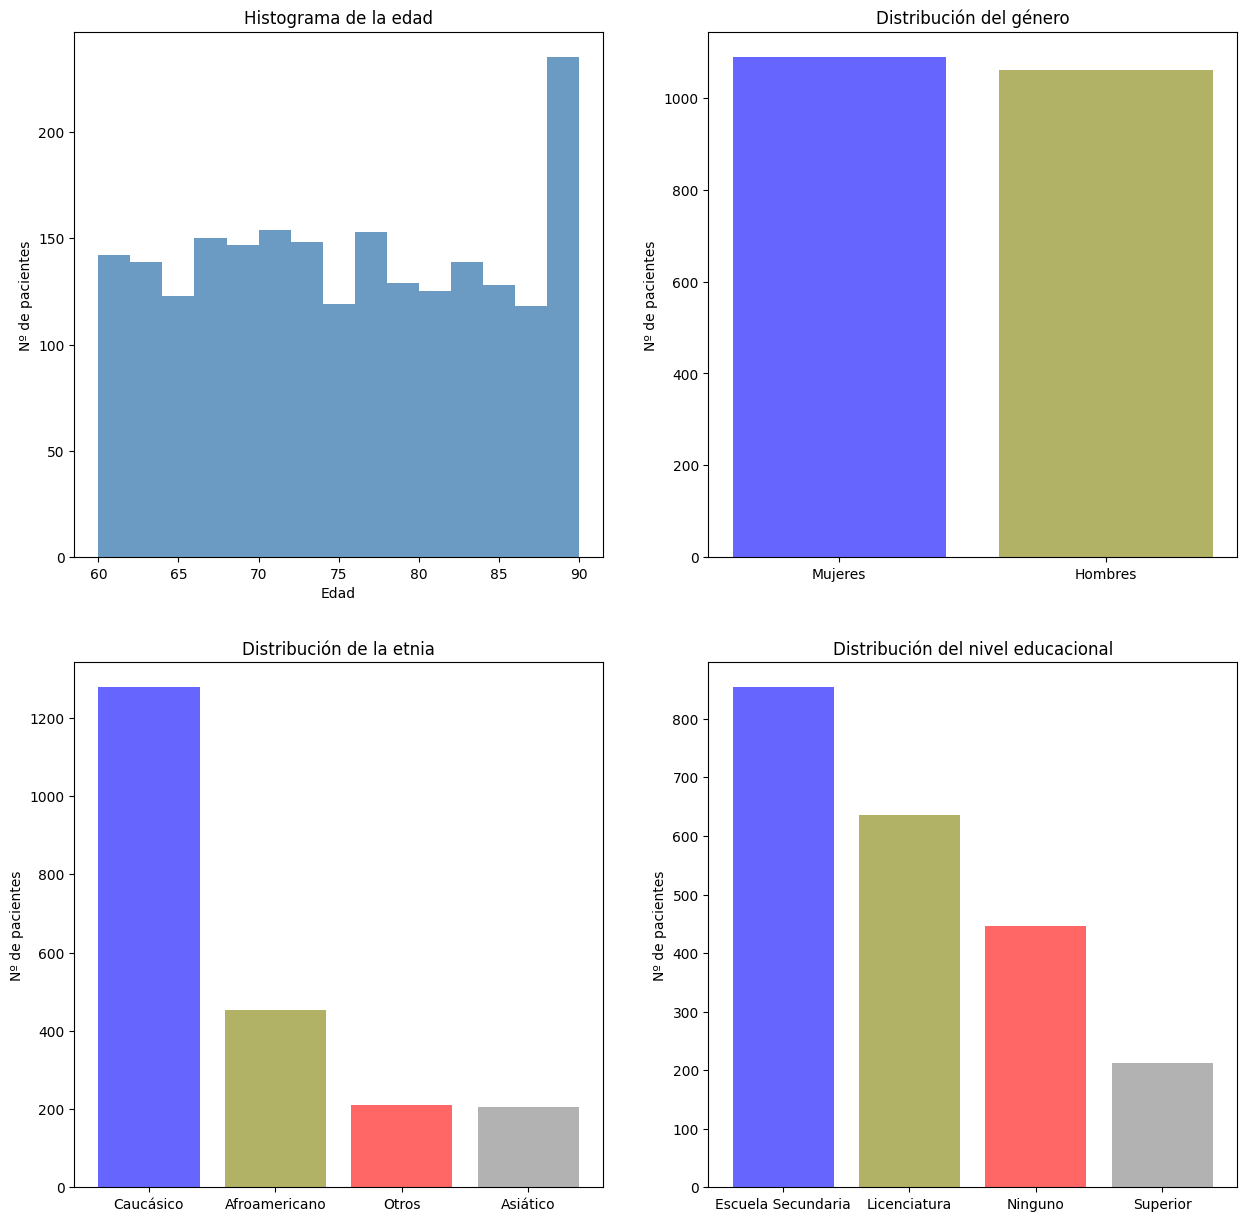

In [10]:
colores = ["blue", "olive", "red", "gray"]
fig, ax = plt.subplots(2,2, figsize= (15,15))

# EDAD 
ax[0,0].hist([df_alzheimer["Age"]], bins = 15, alpha = 0.8, color = "steelblue");
ax[0,0].set_title("Histograma de la edad")
ax[0,0].set_xlabel("Edad")
ax[0,0].set_ylabel("Nº de pacientes")

# GÉNERO
gender_counts = df_alzheimer["Gender"].value_counts()
labels = ["Hombres" if gender == 0 else "Mujeres" for gender in gender_counts.index]

ax[0,1].bar(x=labels, height=gender_counts.to_list(), color=colores[:2], alpha=0.6);
ax[0,1].set_title("Distribución del género");
ax[0,1].set_ylabel("Nº de pacientes");

#ETNIA
ethnicity_counts = df_alzheimer["Ethnicity"].value_counts()
labels = ["Caucásico" if eth == 0 else 
          "Afroamericano" if eth == 1 else 
          "Asiático" if eth == 2 else 
          "Otros" for eth in ethnicity_counts.index]

ax[1,0].bar(x=labels, height=ethnicity_counts.to_list(), color=colores, alpha=0.6);
ax[1,0].set_title("Distribución de la etnia");
ax[1,0].set_ylabel("Nº de pacientes");

# EDUCACION
education_counts = df_alzheimer["EducationLevel"].value_counts()
labels = ["Ninguno" if eth == 0 else 
          "Escuela Secundaria" if eth == 1 else 
          "Licenciatura" if eth == 2 else 
          "Superior" for eth in education_counts.index]

ax[1,1].bar(x=labels, height=education_counts.to_list(), color=colores, alpha=0.6);
ax[1,1].set_title("Distribución del nivel educacional");
ax[1,1].set_ylabel("Nº de pacientes");

Factores lifestyle - observaciones:

* BMI distribuido uniformemente y sin valores que se salgan de lo marcado (15-40).
* Hay más del doble de pacientes que no fuman, pero no hay valores anómalos.
* El consumo semanal de alcohol tampoco tiene ningún outlier, van de manera uniforme en el rango indicado (0-20).
* El ejercicio físico semanal tampoco tiene ningún outlier, van de manera uniforme en el rango indicado (0-10).
* La calidad de la dieta tampoco tiene ningún outlier, van de manera uniforme en el rango indicado (0-10).
* La calidad del sueño tampoco tiene ningún outlier, van de manera uniforme en el rango indicado (4-10).



Text(0, 0.5, 'Score')

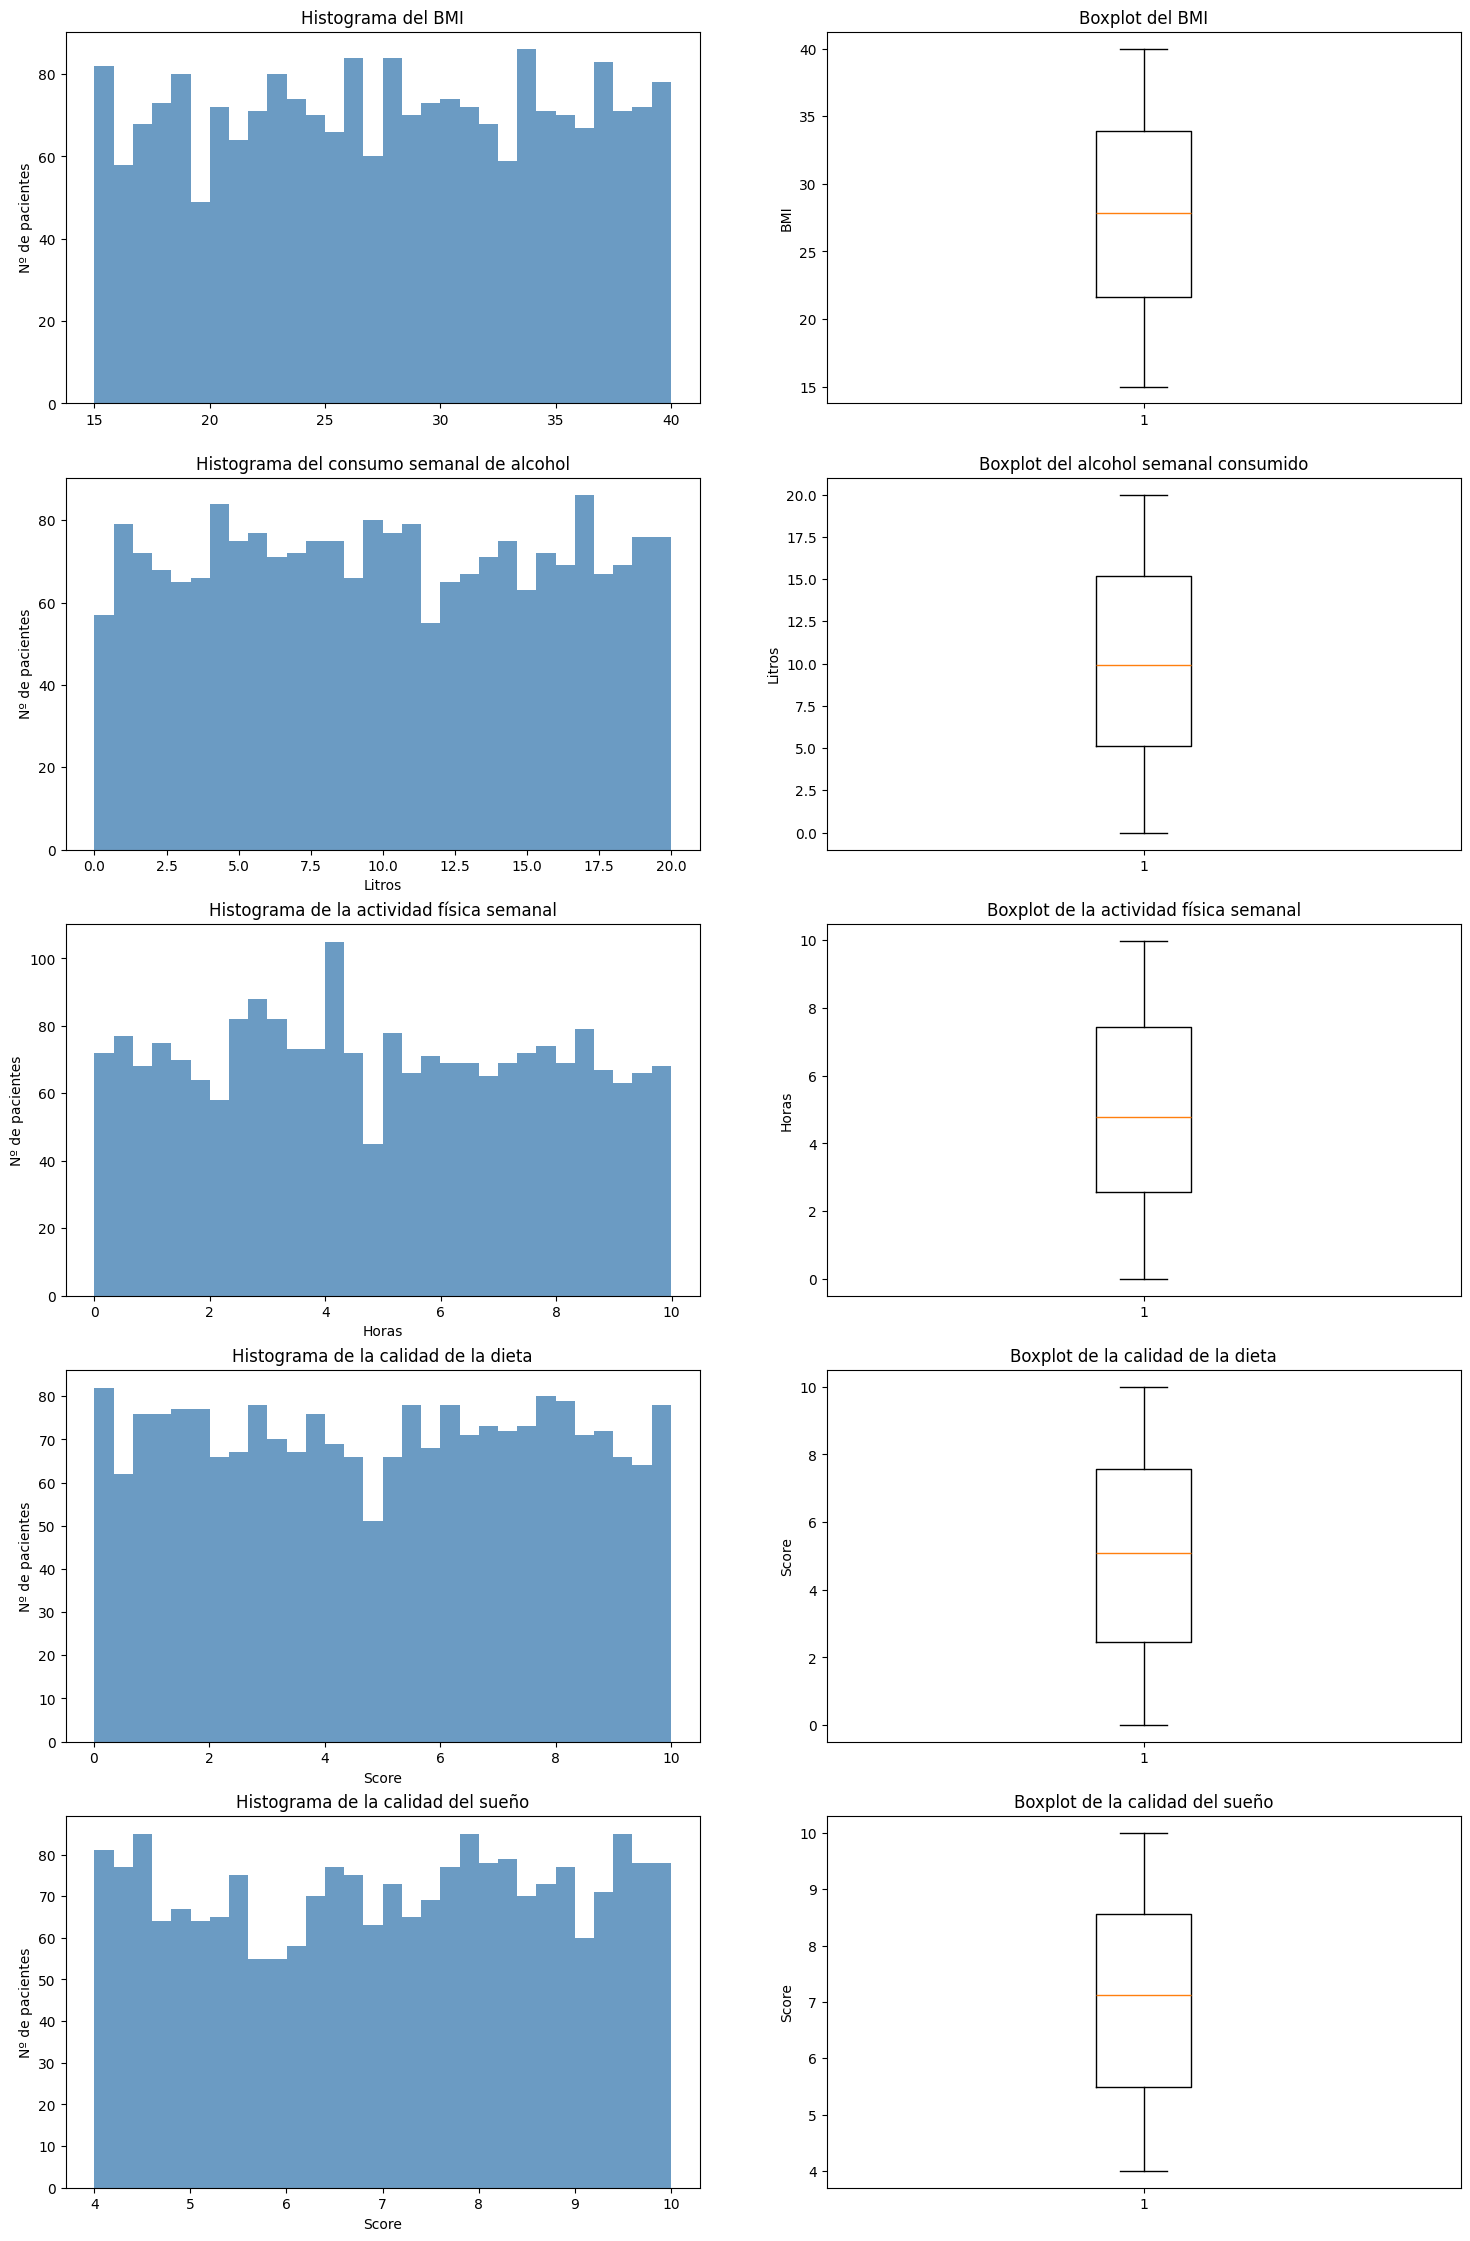

In [11]:
fig, ax = plt.subplots(5,2, figsize = (18,28))

# BMI
ax[0,0].hist([df_alzheimer["BMI"]], bins = 30, alpha = 0.8, color = "steelblue");
ax[0,0].set_title("Histograma del BMI")
ax[0,0].set_ylabel("Nº de pacientes")

ax[0,1].boxplot(df_alzheimer["BMI"]);
ax[0,1].set_title("Boxplot del BMI")
ax[0,1].set_ylabel("BMI")

#ALCOHOL
ax[1,0].hist([df_alzheimer["AlcoholConsumption"]], bins = 30, alpha = 0.8, color = "steelblue");
ax[1,0].set_title("Histograma del consumo semanal de alcohol")
ax[1,0].set_ylabel("Nº de pacientes")
ax[1,0].set_xlabel("Litros")

ax[1,1].boxplot(df_alzheimer["AlcoholConsumption"]);
ax[1,1].set_title("Boxplot del alcohol semanal consumido")
ax[1,1].set_ylabel("Litros")

# ACTIVIDAD FISICA
ax[2,0].hist([df_alzheimer["PhysicalActivity"]], bins = 30, alpha = 0.8, color = "steelblue");
ax[2,0].set_title("Histograma de la actividad física semanal")
ax[2,0].set_ylabel("Nº de pacientes")
ax[2,0].set_xlabel("Horas")

ax[2,1].boxplot(df_alzheimer["PhysicalActivity"]);
ax[2,1].set_title("Boxplot de la actividad física semanal")
ax[2,1].set_ylabel("Horas")

# DIETA
ax[3,0].hist([df_alzheimer["DietQuality"]], bins = 30, alpha = 0.8, color = "steelblue");
ax[3,0].set_title("Histograma de la calidad de la dieta")
ax[3,0].set_ylabel("Nº de pacientes")
ax[3,0].set_xlabel("Score")

ax[3,1].boxplot(df_alzheimer["DietQuality"]);
ax[3,1].set_title("Boxplot de la calidad de la dieta")
ax[3,1].set_ylabel("Score")

# SUEÑO
ax[4,0].hist([df_alzheimer["SleepQuality"]], bins = 30, alpha = 0.8, color = "steelblue");
ax[4,0].set_title("Histograma de la calidad del sueño")
ax[4,0].set_ylabel("Nº de pacientes")
ax[4,0].set_xlabel("Score")

ax[4,1].boxplot(df_alzheimer["SleepQuality"]);
ax[4,1].set_title("Boxplot de la calidad del sueño")
ax[4,1].set_ylabel("Score")

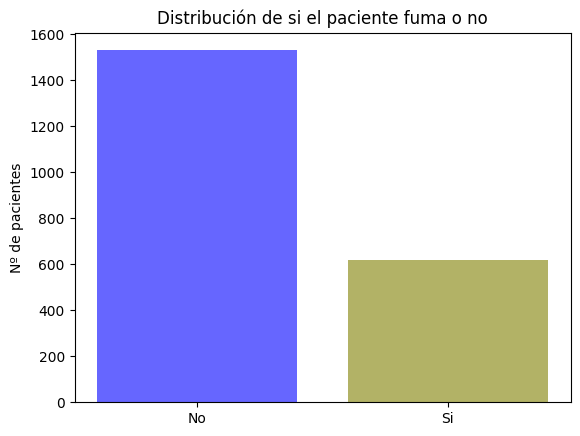

In [12]:
colores = ["blue", "olive"]

smoking_counts = df_alzheimer["Smoking"].value_counts()
labels = ["No" if gender == 0 else "Si" for gender in smoking_counts.index]

plt.bar(x=labels, height=smoking_counts.to_list(), color=colores, alpha=0.6);
plt.title("Distribución de si el paciente fuma o no");
plt.ylabel("Nº de pacientes");

Historial médico - observaciones:

* La mayoría de gente no tienen antecedentes familiares de Alzheimer, pero no hay valores anómalos en la variable.
* La mayoría no tienen enfermedades cardiovasculares, no hay valores anómalos en la variable.
* La mayoría no tienen diabetes, no hay valores anómalos en la variable.
* La mayoría no tienen depresión, no hay valores anómalos en la variable.
* La mayoría no tienen traumatismo craneal, no hay valores anómalos en la variable.
* La mayoría no tienen hipertensión, no hay valores anómalos en la variable.



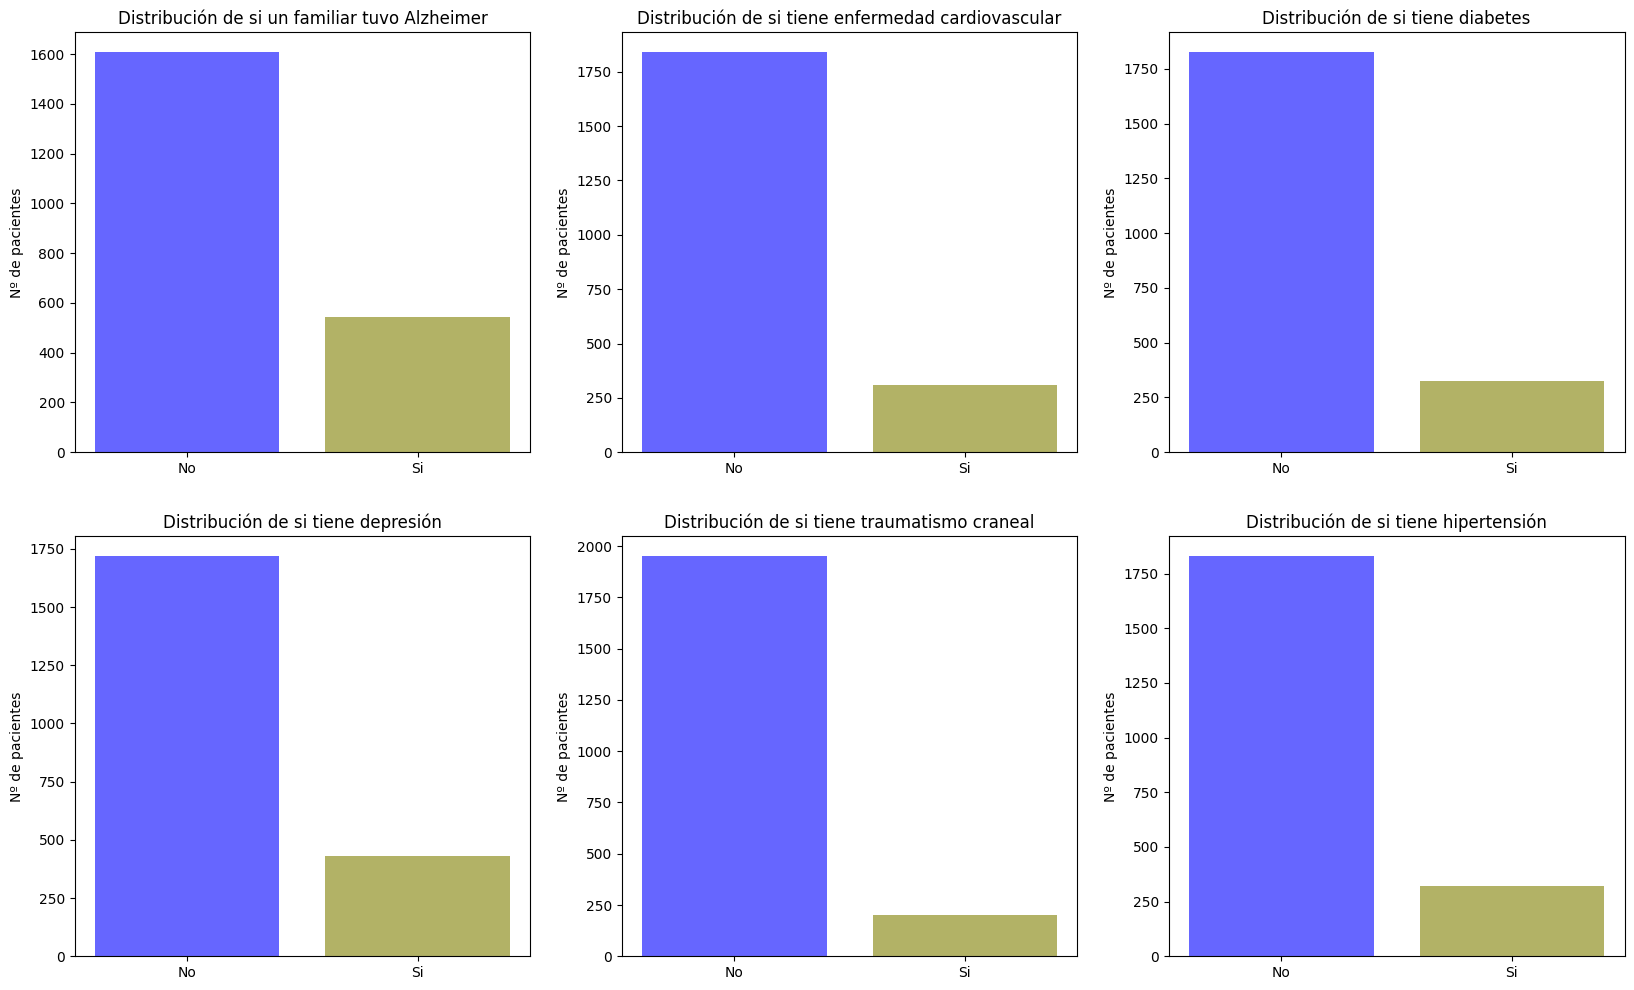

In [13]:
fix, ax = plt.subplots(2,3, figsize = (20,12))

colores = ["blue", "olive"]

# FAMILIAR
family_counts = df_alzheimer["FamilyHistoryAlzheimers"].value_counts()
labels = ["No" if fam == 0 else "Si" for fam in family_counts.index]

ax[0,0].bar(x=labels, height=family_counts.to_list(), color=colores, alpha=0.6);
ax[0,0].set_title("Distribución de si un familiar tuvo Alzheimer");
ax[0,0].set_ylabel("Nº de pacientes");

# ENF CARDIOVASCULAR
card_counts = df_alzheimer["CardiovascularDisease"].value_counts()
labels = ["No" if car == 0 else "Si" for car in card_counts.index]

ax[0,1].bar(x=labels, height=card_counts.to_list(), color=colores, alpha=0.6);
ax[0,1].set_title("Distribución de si tiene enfermedad cardiovascular");
ax[0,1].set_ylabel("Nº de pacientes");

# DIABETES 
diabetes_counts = df_alzheimer["Diabetes"].value_counts()
labels = ["No" if diab == 0 else "Si" for diab in diabetes_counts.index]

ax[0,2].bar(x=labels, height=diabetes_counts.to_list(), color=colores, alpha=0.6);
ax[0,2].set_title("Distribución de si tiene diabetes");
ax[0,2].set_ylabel("Nº de pacientes");

# DEPRESIÓN
depression_counts = df_alzheimer["Depression"].value_counts()
labels = ["No" if dep == 0 else "Si" for dep in depression_counts.index]

ax[1,0].bar(x=labels, height=depression_counts.to_list(), color=colores, alpha=0.6);
ax[1,0].set_title("Distribución de si tiene depresión");
ax[1,0].set_ylabel("Nº de pacientes");

# TRAUMATISMO CRANEAL
hi_counts = df_alzheimer["HeadInjury"].value_counts()
labels = ["No" if hi == 0 else "Si" for hi in hi_counts.index]

ax[1,1].bar(x=labels, height=hi_counts.to_list(), color=colores, alpha=0.6);
ax[1,1].set_title("Distribución de si tiene traumatismo craneal");
ax[1,1].set_ylabel("Nº de pacientes");

# HIPERTENSIÓN
hypertension_counts = df_alzheimer["Hypertension"].value_counts()
labels = ["No" if hyp == 0 else "Si" for hyp in hypertension_counts.index]

ax[1,2].bar(x=labels, height=hypertension_counts.to_list(), color=colores, alpha=0.6);
ax[1,2].set_title("Distribución de si tiene hipertensión");
ax[1,2].set_ylabel("Nº de pacientes");

Mediciones clínicas:

* MAP: tiene una distribución normal y sin outliers.
* Colesterol total tiene una distribución uniforme y sin outliers.

Text(0, 0.5, 'mg/dL')

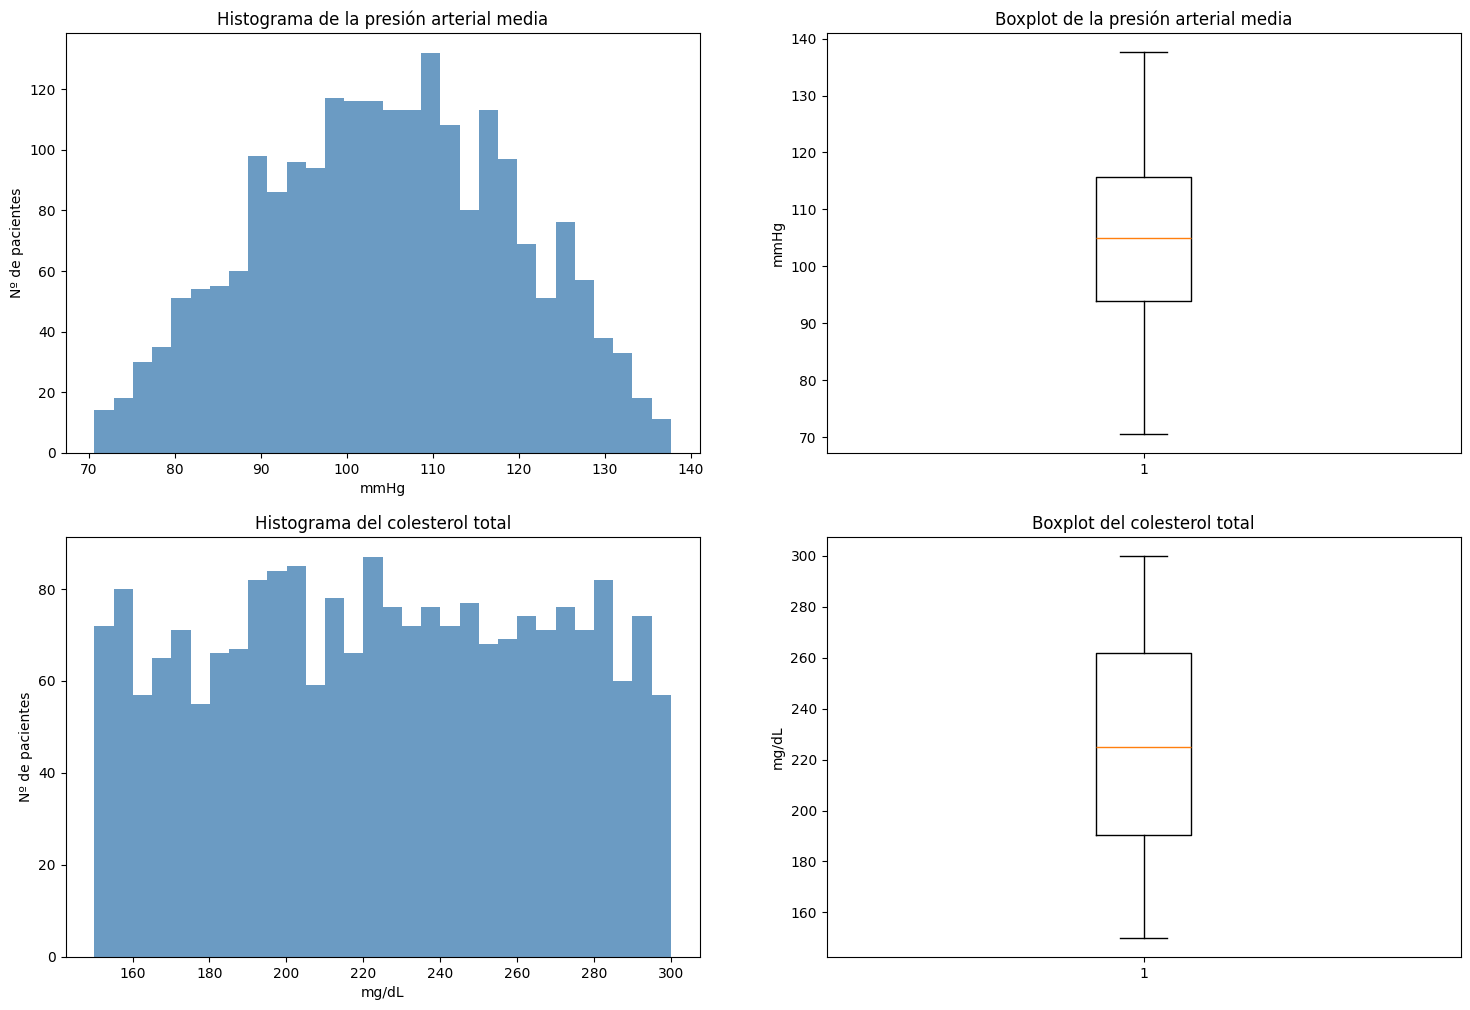

In [14]:
fig, ax = plt.subplots(2,2, figsize = (18,12))

# MAP
ax[0,0].hist([df_alzheimer["MAP"]], bins = 30, alpha = 0.8, color = "steelblue");
ax[0,0].set_title("Histograma de la presión arterial media")
ax[0,0].set_ylabel("Nº de pacientes")
ax[0,0].set_xlabel("mmHg")

ax[0,1].boxplot(df_alzheimer["MAP"]);
ax[0,1].set_title("Boxplot de la presión arterial media")
ax[0,1].set_ylabel("mmHg")

# COLESTEROL
ax[1,0].hist([df_alzheimer["CholesterolTotal"]], bins = 30, alpha = 0.8, color = "steelblue");
ax[1,0].set_title("Histograma del colesterol total")
ax[1,0].set_ylabel("Nº de pacientes")
ax[1,0].set_xlabel("mg/dL")

ax[1,1].boxplot(df_alzheimer["CholesterolTotal"]);
ax[1,1].set_title("Boxplot del colesterol total")
ax[1,1].set_ylabel("mg/dL")

Evaluaciones cognitivas y funcionales

* MMSE no hay outliers, se ve una distribución uniforme.
* La evaluación funcional tiene distribución uniforme, pero no hay outliers.
* Sucede lo mismo con las actividades diarias.
* Respecto a quejas de su memoria, sigue siendo mayor los pacientes que no tienen, no hay outliers.
* La mayoría no tiene problemas de comportamiento, sin outliers.

Text(0, 0.5, 'score')

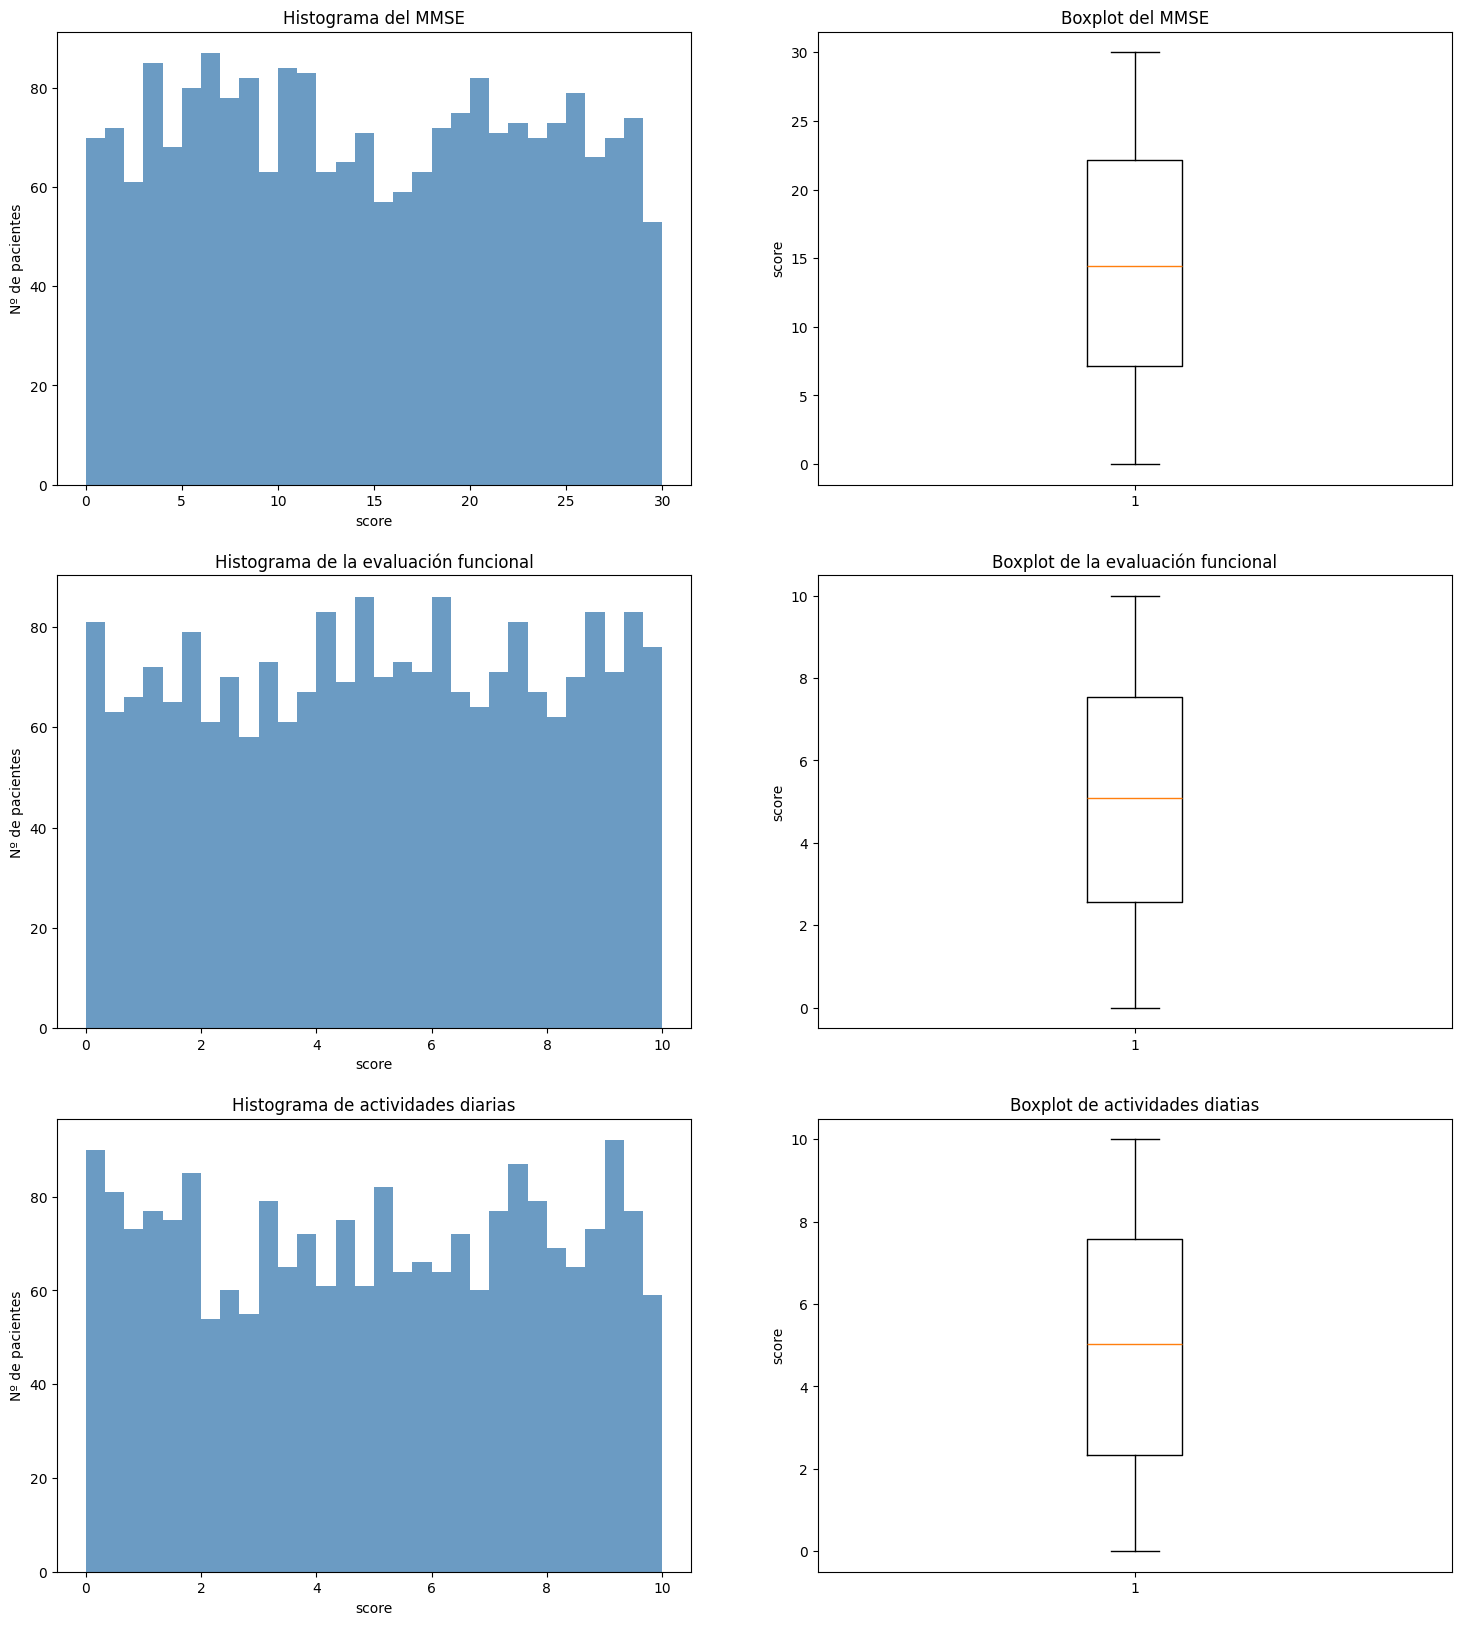

In [15]:
fig, ax = plt.subplots(3,2, figsize = (18,20))

# MMSE
ax[0,0].hist([df_alzheimer["MMSE"]], bins = 30, alpha = 0.8, color = "steelblue");
ax[0,0].set_title("Histograma del MMSE")
ax[0,0].set_ylabel("Nº de pacientes")
ax[0,0].set_xlabel("score")

ax[0,1].boxplot(df_alzheimer["MMSE"]);
ax[0,1].set_title("Boxplot del MMSE")
ax[0,1].set_ylabel("score")

# evaluacion funcional
ax[1,0].hist([df_alzheimer["FunctionalAssessment"]], bins = 30, alpha = 0.8, color = "steelblue");
ax[1,0].set_title("Histograma de la evaluación funcional")
ax[1,0].set_ylabel("Nº de pacientes")
ax[1,0].set_xlabel("score")

ax[1,1].boxplot(df_alzheimer["FunctionalAssessment"]);
ax[1,1].set_title("Boxplot de la evaluación funcional")
ax[1,1].set_ylabel("score")

# actividades diarias
ax[2,0].hist([df_alzheimer["ADL"]], bins = 30, alpha = 0.8, color = "steelblue");
ax[2,0].set_title("Histograma de actividades diarias")
ax[2,0].set_ylabel("Nº de pacientes")
ax[2,0].set_xlabel("score")

ax[2,1].boxplot(df_alzheimer["ADL"]);
ax[2,1].set_title("Boxplot de actividades diatias")
ax[2,1].set_ylabel("score")

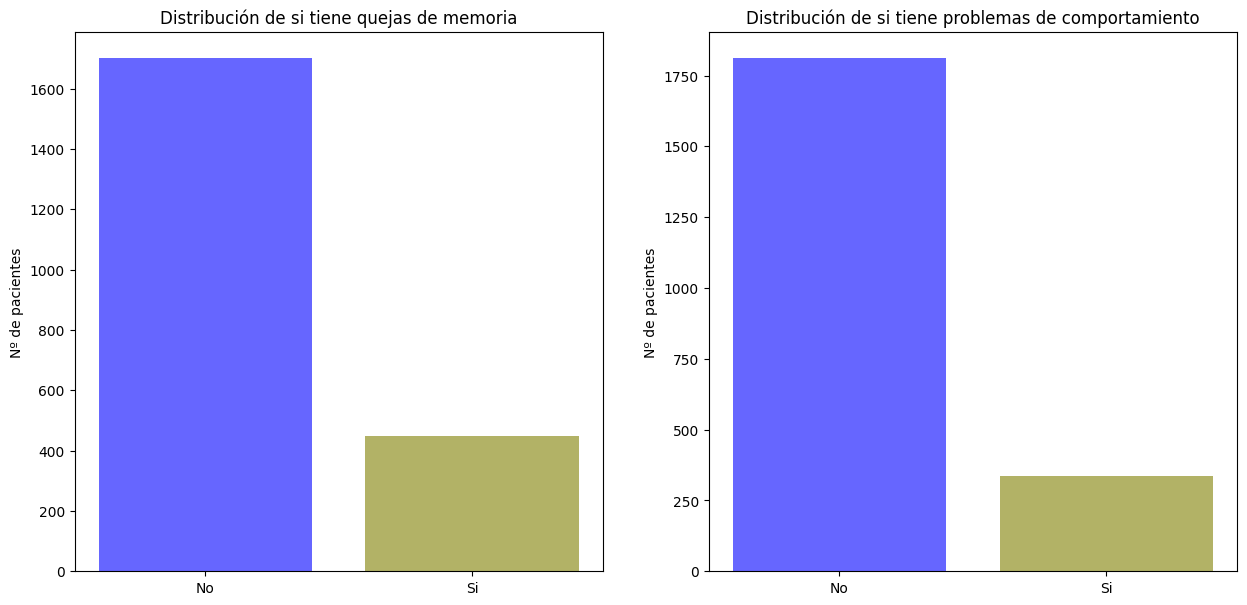

In [16]:
fig, ax = plt.subplots(1,2, figsize = (15,7))

# Queja memoria
memory_counts = df_alzheimer["MemoryComplaints"].value_counts()
labels = ["No" if mem == 0 else "Si" for mem in memory_counts.index]

ax[0].bar(x=labels, height=memory_counts.to_list(), color=colores, alpha=0.6);
ax[0].set_title("Distribución de si tiene quejas de memoria");
ax[0].set_ylabel("Nº de pacientes");

# Problema comportamiento
behav_counts = df_alzheimer["BehavioralProblems"].value_counts()
labels = ["No" if behav == 0 else "Si" for behav in behav_counts.index]

ax[1].bar(x=labels, height=behav_counts.to_list(), color=colores, alpha=0.6);
ax[1].set_title("Distribución de si tiene problemas de comportamiento");
ax[1].set_ylabel("Nº de pacientes");

Síntomas:

* La mayoría no tiene confusión y no hay outliers.
* La mayoría no tiene desorientación y no hay outliers.
* La mayoría no tiene cambios de personalidad y no hay outliers.
* La mayoría no tiene dificultad en completar tareas y no hay outliers.
* La mayoría no tiene falta de memoria y no hay outliers.


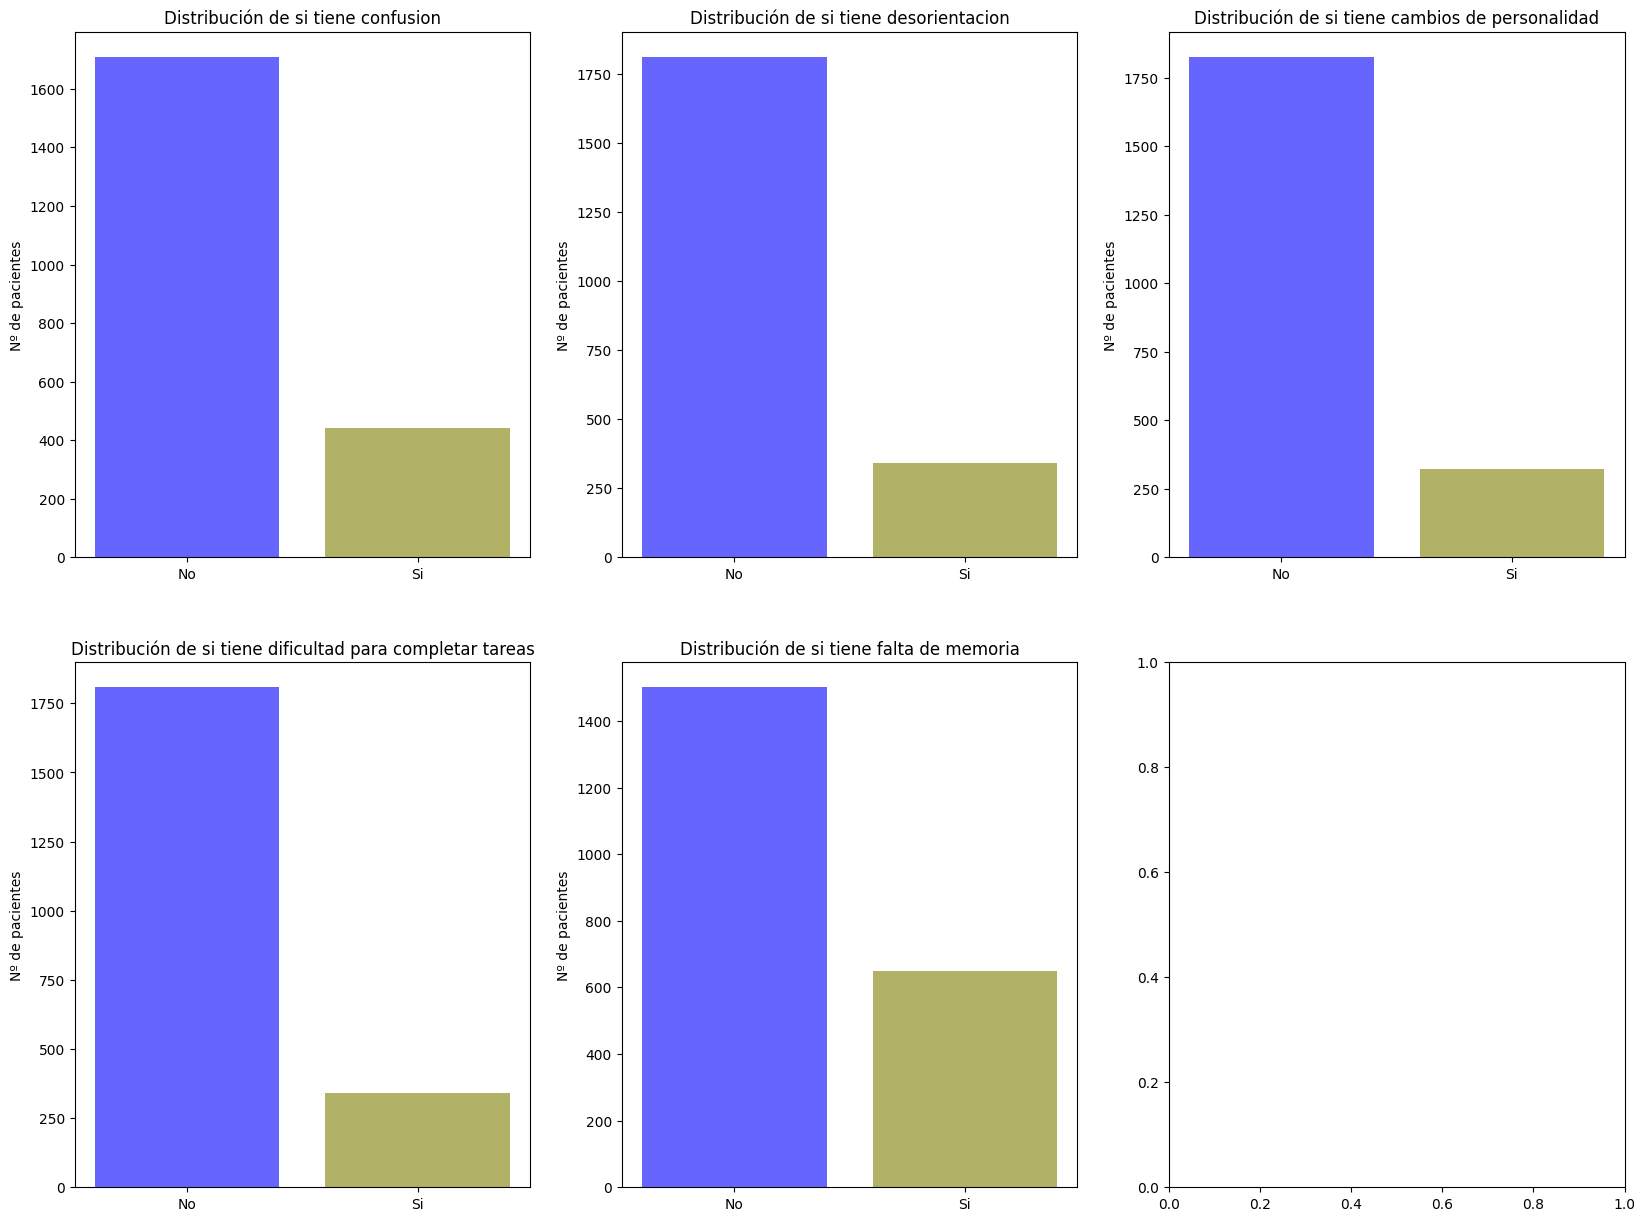

In [17]:
fig, ax = plt.subplots(2,3, figsize =(20,15))

#CONFUSION
conf_counts = df_alzheimer["Confusion"].value_counts()
labels = ["No" if i == 0 else "Si" for i in conf_counts.index]

ax[0,0].bar(x=labels, height=conf_counts.to_list(), color=colores, alpha=0.6);
ax[0,0].set_title("Distribución de si tiene confusion");
ax[0,0].set_ylabel("Nº de pacientes");

#DESORIENTACION
dis_counts = df_alzheimer["Disorientation"].value_counts()
labels = ["No" if i == 0 else "Si" for i in dis_counts.index]

ax[0,1].bar(x=labels, height=dis_counts.to_list(), color=colores, alpha=0.6);
ax[0,1].set_title("Distribución de si tiene desorientacion");
ax[0,1].set_ylabel("Nº de pacientes");


# CAMBIOS DE PERSONALIDAD
per_counts = df_alzheimer["PersonalityChanges"].value_counts()
labels = ["No" if i == 0 else "Si" for i in per_counts.index]

ax[0,2].bar(x=labels, height=per_counts.to_list(), color=colores, alpha=0.6);
ax[0,2].set_title("Distribución de si tiene cambios de personalidad");
ax[0,2].set_ylabel("Nº de pacientes");


# DIFICULTAD EN COMPLETAR TAREAS
dif_counts = df_alzheimer["DifficultyCompletingTasks"].value_counts()
labels = ["No" if i == 0 else "Si" for i in dif_counts.index]

ax[1,0].bar(x=labels, height=dif_counts.to_list(), color=colores, alpha=0.6);
ax[1,0].set_title("Distribución de si tiene dificultad para completar tareas");
ax[1,0].set_ylabel("Nº de pacientes");


# FALTA DE MEMORIA
forget_counts = df_alzheimer["Forgetfulness"].value_counts()
labels = ["No" if i == 0 else "Si" for i in forget_counts.index]

ax[1,1].bar(x=labels, height=forget_counts.to_list(), color=colores, alpha=0.6);
ax[1,1].set_title("Distribución de si tiene falta de memoria");
ax[1,1].set_ylabel("Nº de pacientes");

### 4. Analysis

##### Análisis univariante

En este caso, ya se ha visto la distribución absoluta de las variables del dataset mediante gráficas tales como: diagramas de barras, boxplots e histogramas. Para este dataset concreto, este análisis no es el más relevante ya que mezcla personas diagnosticadas y no diagnosticadas de Alzheimer, es simplemente por ver la tendencia general que siguen los pacientes.

Estadísticos de centralidad y de dispersión mediante `describe`de todas las variables. Se muestra media, mediana, percentiles, máximo, mínimo y desviación estándar.

In [18]:
df_alzheimer.describe()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,MAP
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,7.051081,...,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653,104.653482
std,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,1.763573,...,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214,14.591024
min,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,4.002629,...,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.666667
25%,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,5.482997,...,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000
50%,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,7.115646,...,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,105.000000
75%,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,8.562521,...,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,115.666667
max,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,9.999840,...,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,137.666667


Comentarios:

* Datos demográficos: la edad media es alta, de 75 años, el género está equilibrado, hay muchas más personas caucásicas, el nivel educacionar estándar es secundaria, hay más gente sin estudios que con superiores.
* Lifestyle: todos tienen una distribución uniforme, el BMI medio es 27.65, el consumo de alcohol semanal son 10 L, la actividad física son 5h semanales, la calidad de la dieta un 5, la calidad del sueño 7 y la mayoría no fuman. Muchos tienen alta la varianza.
* Historial médico: todas ellas tienen más pacientes que no las cumplen. Habrá que ver si depende de sufrir Alzheimer o no.
* Mediciones clínicas: la presión arterial sigue una distribución normal y el colesterol es más uniforme.
* Evaluaciones cognitivas: Todas tienen una distribución bastante uniforme. Habrá que ver si depende de sufrir Alzheimer o no. La mayoría no tiene qeujas de memoria ni de coportamiento.
* Síntomas: la mayoría en todos sale que no, aunque la más elevada es problemas de memoria. Habrá que ver si depende de sufrir Alzheimer o no.

En resumen, estas distribuciones nos indican que son personas de avanzada edad con las variables bastante uniformes, lo que nos anima a buscar si aparecen diferencias o relaciones entre las personas que están diagnosticadas o no.

##### Análisis bivariante

En primer lugar, en este apartado se va a comprobar la distribución de las variables según si los pacientes están diagnosticados con Alzheimer (1) o no (0), que es la parte intresante en este dataset.

Datos demográficos, se va a tener en cuenta la edad y nivel de educación (sexo era prácticamente 50/50 y en la etnia la gran mayoría eran caucásicos): 

* Edad: aunque hay más pacientes sin Alzheimer, la distribución que siguen es la misma. No se ve una relación entre edad y Alzheimer.
* Educación: sucede lo mismo, se ve la misma distribución en ambos grupos.

Se podría decir que estos datos demográficos no tienen relación con el Alzheimer.
Se pueden mirar las gráficas en relativo, ya que hay muchos más pacientes no diagnósticados y la idea es ver si siguen la misma distribución.


In [19]:
df_alzheimer_NO = df_alzheimer.loc[df_alzheimer.Diagnosis == 0]
df_alzheimer_SI = df_alzheimer.loc[df_alzheimer.Diagnosis == 1]

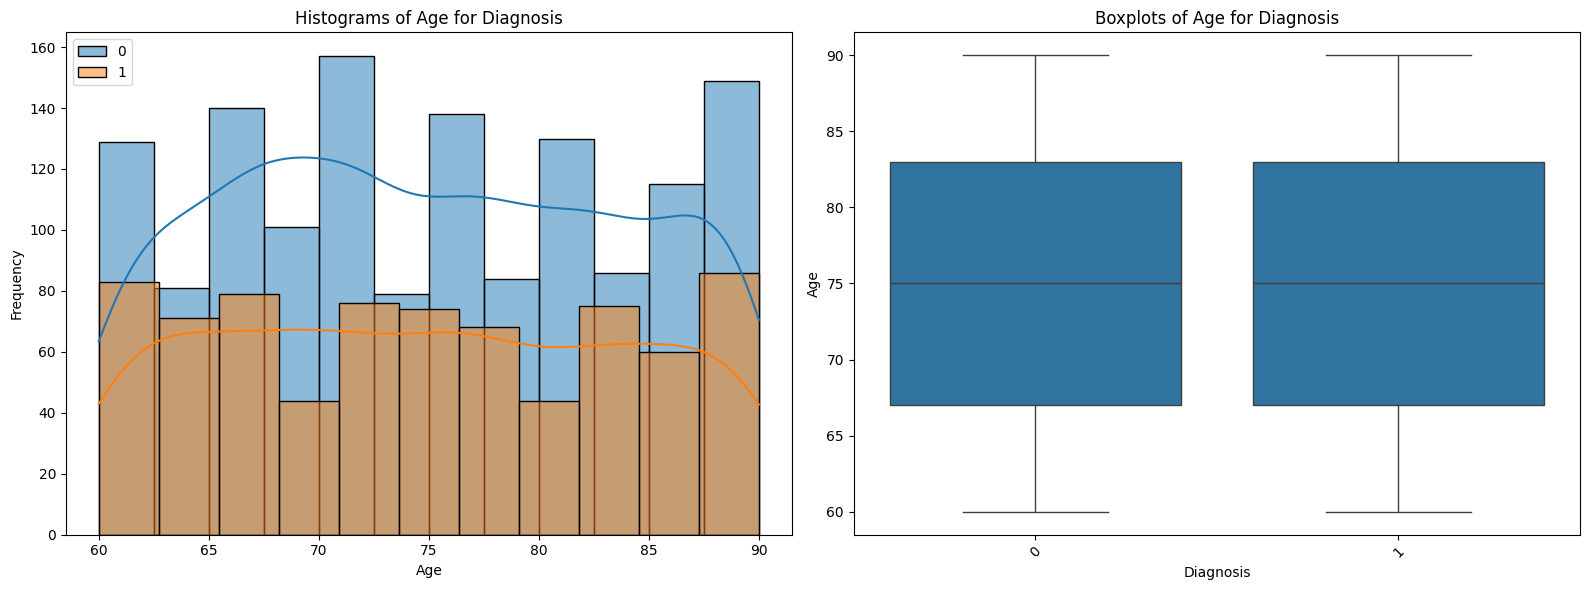

In [20]:
plot_grouped_boxplots_and_histograms(df_alzheimer, "Diagnosis", "Age", group_size = 2)

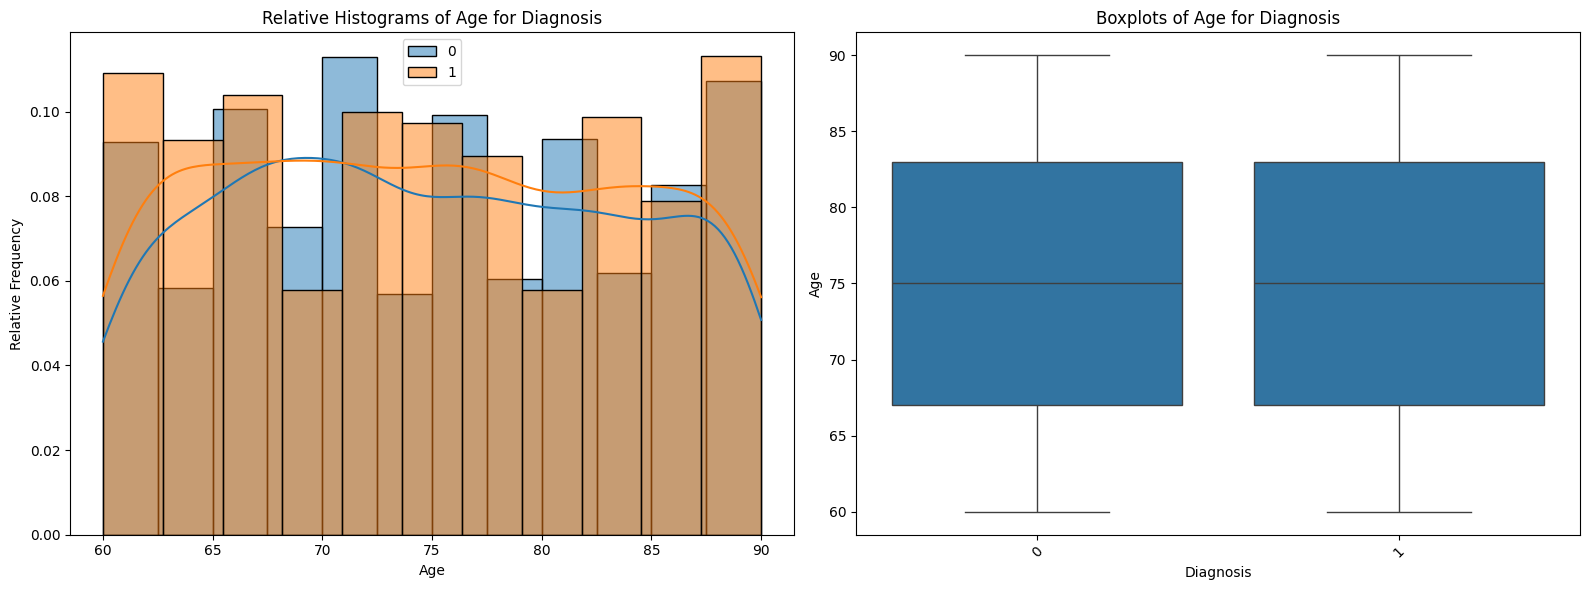

In [21]:
plot_grouped_boxplots_and_histograms_relative(df_alzheimer, "Diagnosis", "Age", group_size = 2)

In [22]:
grupo_a = df_alzheimer.loc[df_alzheimer.Diagnosis == 0]["Age"]
grupo_b = df_alzheimer.loc[df_alzheimer.Diagnosis == 1]["Age"]

u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 531471.0
Valor p: 0.7905593814888701


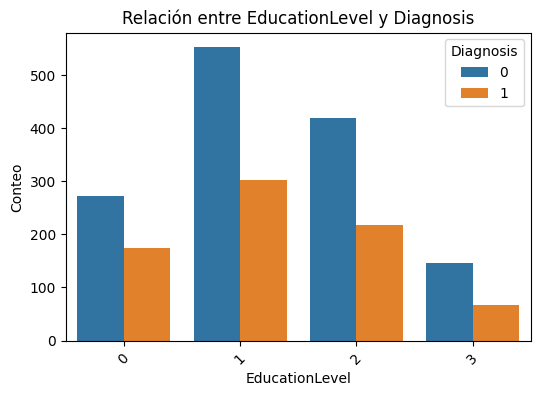

In [23]:
plot_categorical_relationship(df_alzheimer, "EducationLevel", "Diagnosis", relative_freq = False)

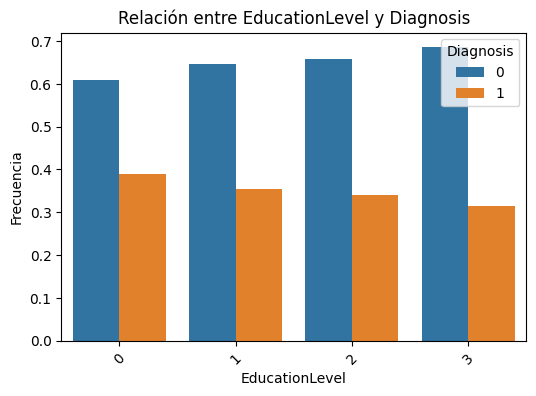

In [25]:
plot_categorical_relationship(df_alzheimer, "EducationLevel", "Diagnosis", relative_freq = True)

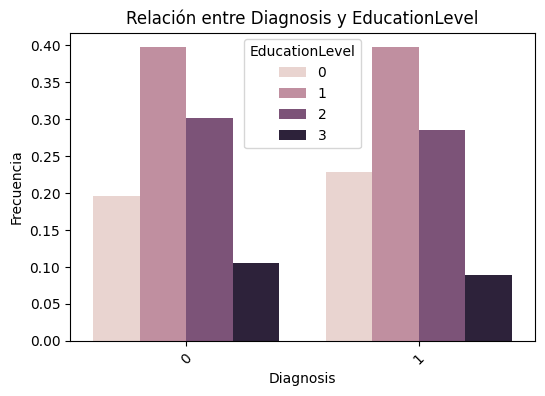

In [24]:
plot_categorical_relationship(df_alzheimer, "Diagnosis", "EducationLevel", relative_freq = True)

In [26]:
tabla_contingencia = pd.crosstab(df_alzheimer["EducationLevel"], df_alzheimer["Diagnosis"])
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)

Valor Chi-Cuadrado: 4.453147172785708
P-Value: 0.2165077197332467


Lifestyle: 

* Sobre BMI vemos algo de diferencia en la función de densidad en los valores más altos, donde sí se ve un ligero pico en las personas con Alzheimer que no existe en los pacientes que no lo tienen.
* En el consumo de alcohol vemos distribuciones uniformes, no se podría destacar una gran diferencia. Es más uniforme el de pacientes no diagnosticados, pero parece que no influye consumir más alcohol semanalmente.
* Sobre la actividad física tienen prácticamente la misma distribución.
* El la calidad de la dieta se aprecia una forma más o menos uniforme en ambos grupos, aunque parece que las personas diagnosticadas con Alzheimer sí cuidan algo más su dieta.
* En la calidad del sueño se ven distribuciones similares, salvo que en las puntuaciones más bajas se ve un ligero pico en las personas con Alzheimer.

Se podría decir gráficamente que las personas con Alzheimer suelen tener mayor BMI, menor calidad del sueño (de forma significativa, p-value<0.05) y cuidar ligeramente mejor la dieta.


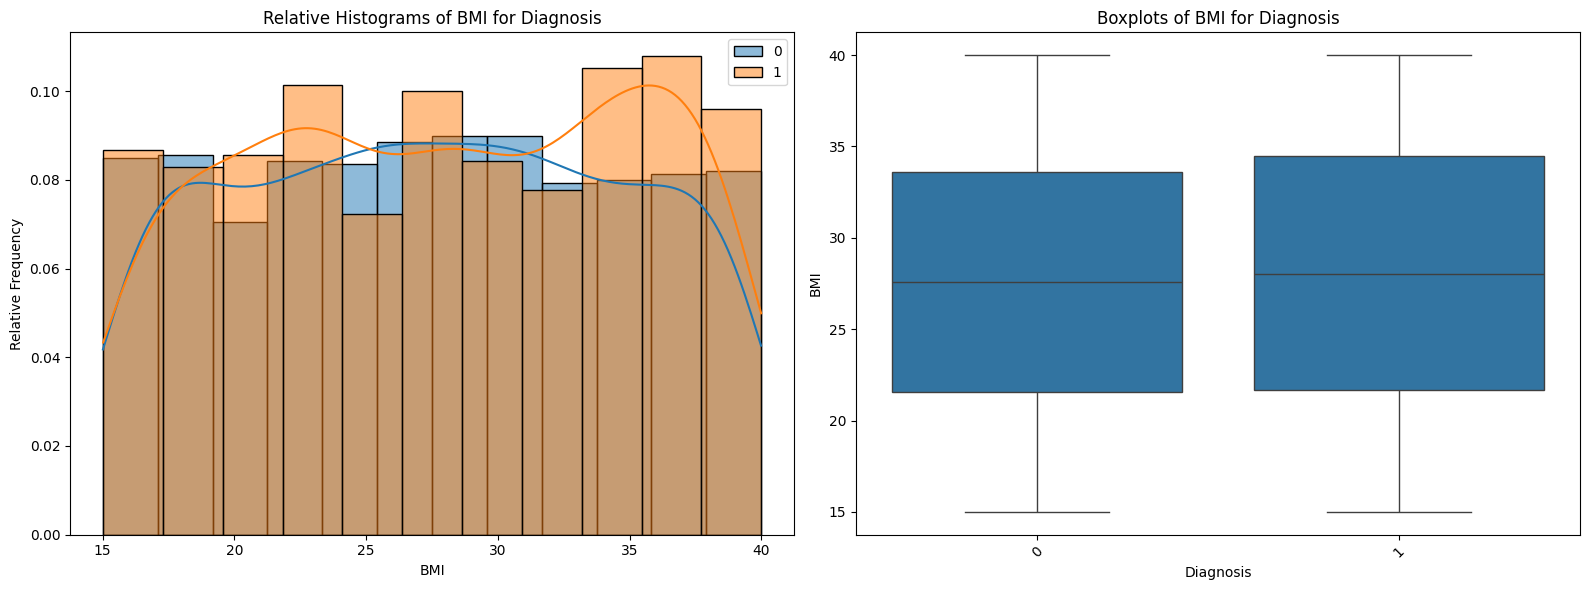

In [27]:
plot_grouped_boxplots_and_histograms_relative(df_alzheimer, "Diagnosis", "BMI", group_size = 2)

In [28]:
grupo_a = df_alzheimer.loc[df_alzheimer.Diagnosis == 0]["BMI"]
grupo_b = df_alzheimer.loc[df_alzheimer.Diagnosis == 1]["BMI"]

u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 510992.0
Valor p: 0.2211099599009012


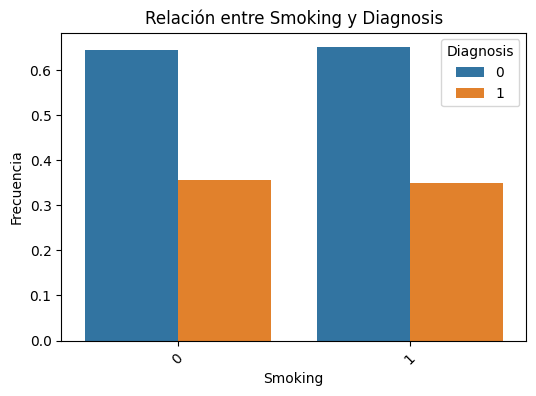

In [29]:
plot_categorical_relationship(df_alzheimer, "Smoking", "Diagnosis", relative_freq = True)

In [30]:
tabla_contingencia = pd.crosstab(df_alzheimer["Smoking"], df_alzheimer["Diagnosis"])
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)


Valor Chi-Cuadrado: 0.030886776214044256
P-Value: 0.860493227376371


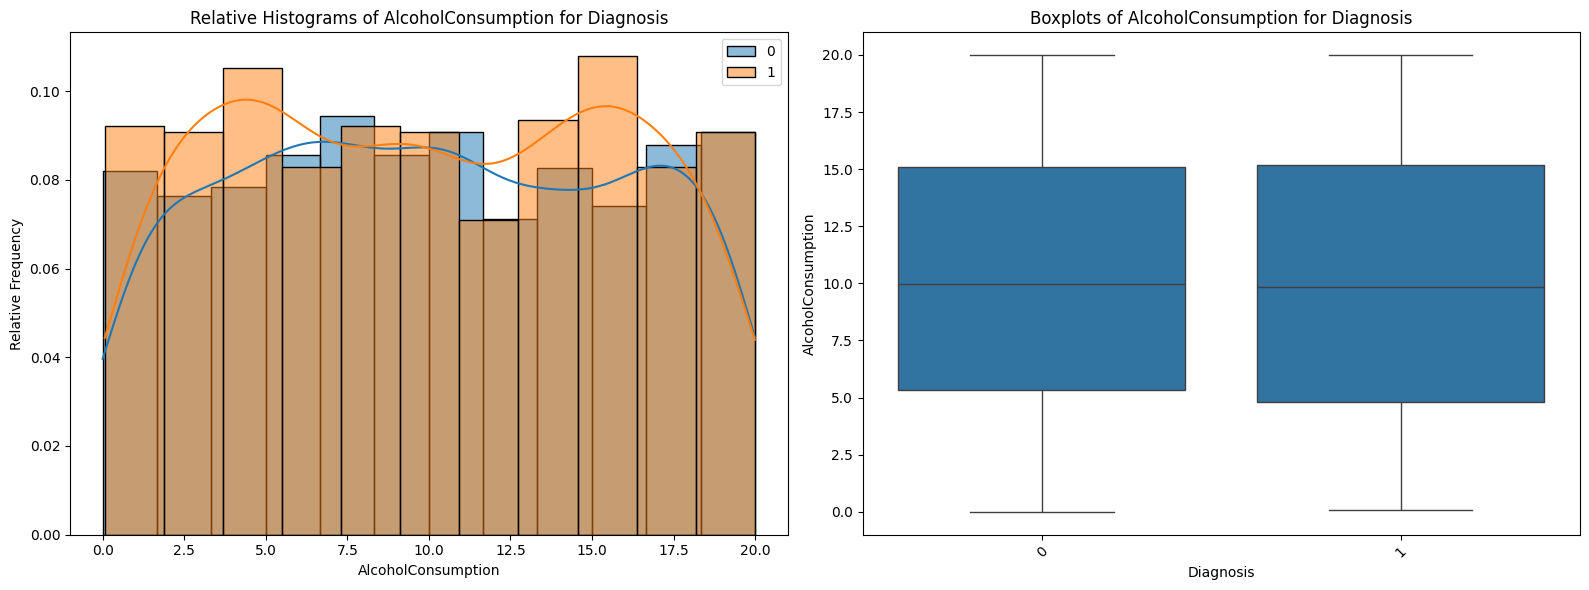

In [31]:
plot_grouped_boxplots_and_histograms_relative(df_alzheimer, "Diagnosis", "AlcoholConsumption", group_size = 2)

In [32]:
grupo_a = df_alzheimer.loc[df_alzheimer.Diagnosis == 0]["AlcoholConsumption"]
grupo_b = df_alzheimer.loc[df_alzheimer.Diagnosis == 1]["AlcoholConsumption"]

u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)


Estadístico U: 533321.0
Valor p: 0.6891866003991506


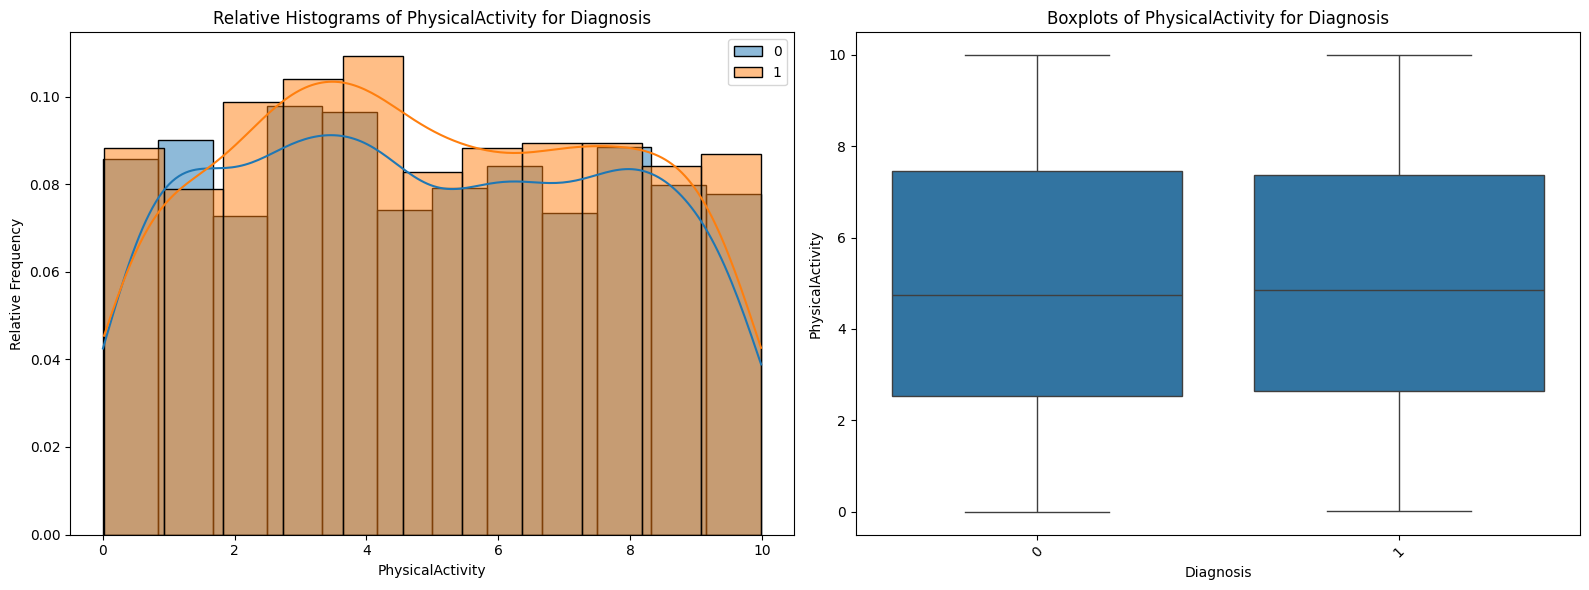

In [33]:
plot_grouped_boxplots_and_histograms_relative(df_alzheimer, "Diagnosis", "PhysicalActivity", group_size = 2)

In [34]:
grupo_a = df_alzheimer.loc[df_alzheimer.Diagnosis == 0]["PhysicalActivity"]
grupo_b = df_alzheimer.loc[df_alzheimer.Diagnosis == 1]["PhysicalActivity"]

u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)


Estadístico U: 524081.0
Valor p: 0.7857462518370166


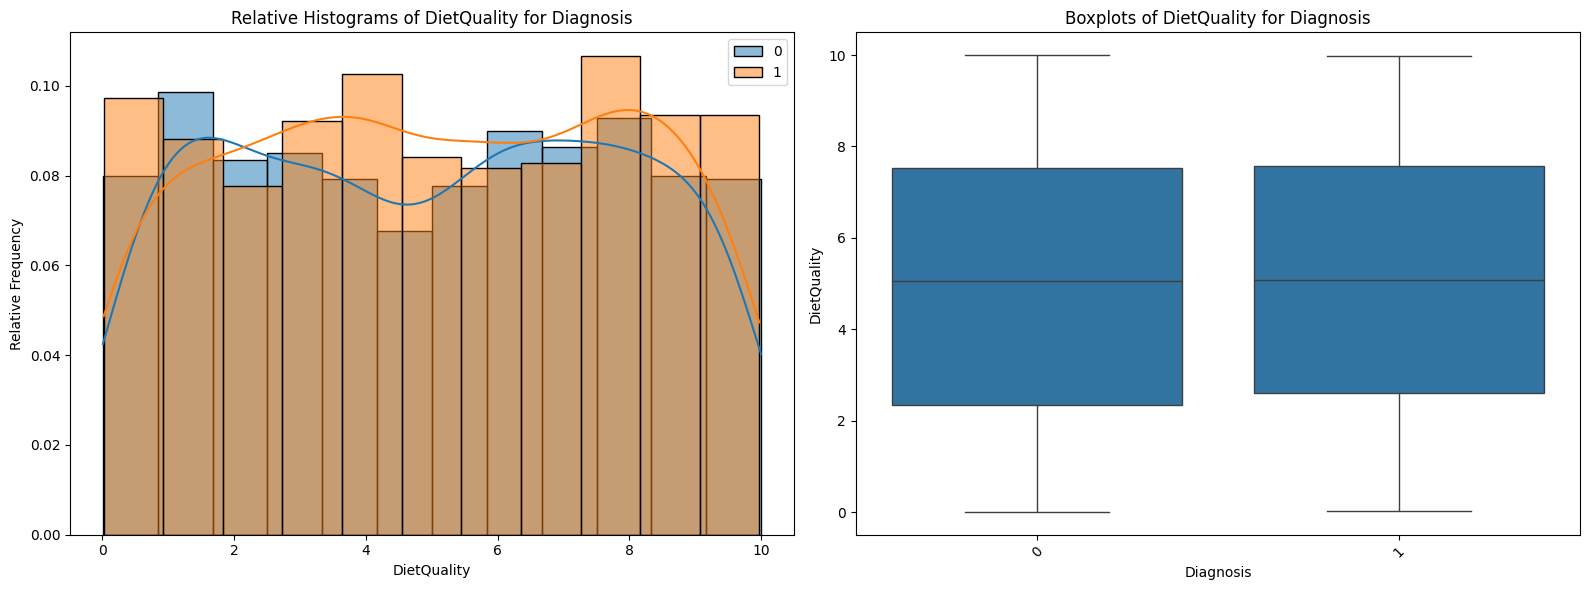

In [35]:
plot_grouped_boxplots_and_histograms_relative(df_alzheimer, "Diagnosis", "DietQuality", group_size = 2)

In [36]:
grupo_a = df_alzheimer.loc[df_alzheimer.Diagnosis == 0]["DietQuality"]
grupo_b = df_alzheimer.loc[df_alzheimer.Diagnosis == 1]["DietQuality"]

u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 522294.0
Valor p: 0.6878481601983906


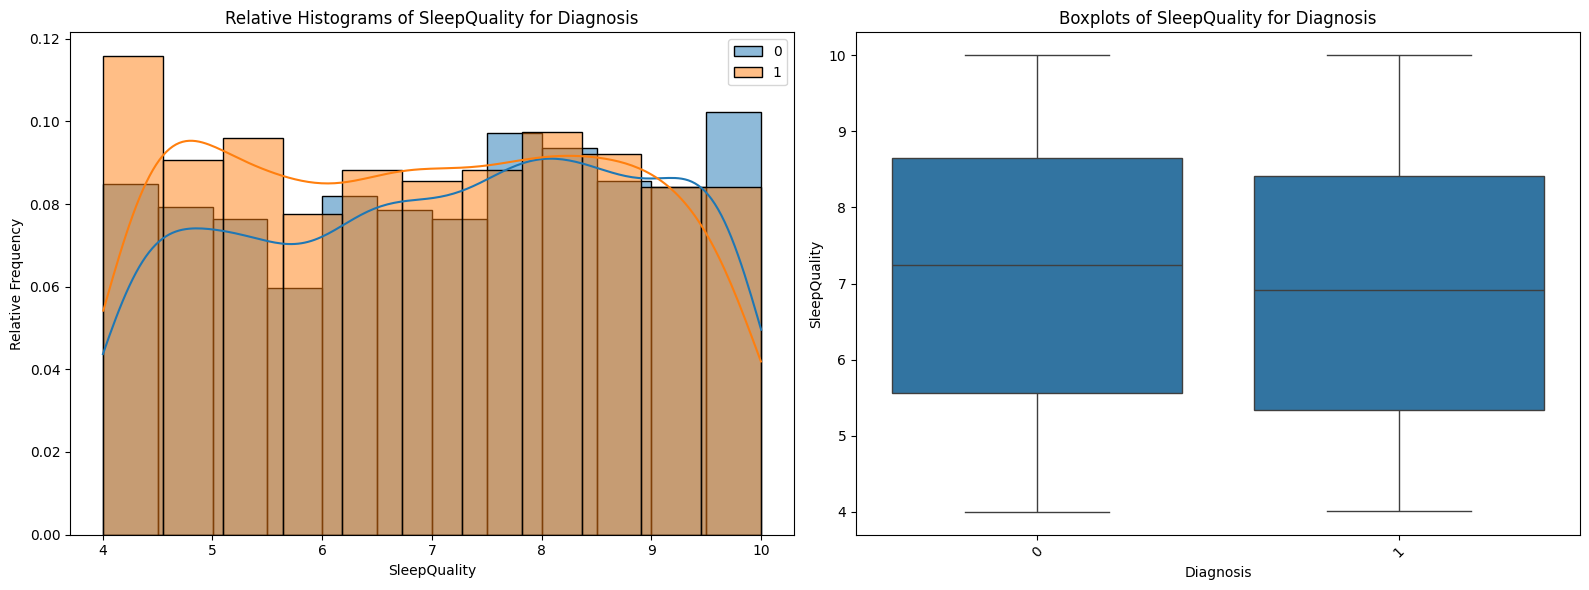

In [37]:
plot_grouped_boxplots_and_histograms_relative(df_alzheimer, "Diagnosis", "SleepQuality", group_size = 2)

In [38]:
print("La información de los NO diagnosticados sobre calidad del sueño es:\n",df_alzheimer_NO["SleepQuality"].describe(),"\n\n", 
      "La información de los SI diagnosticados sobre calidad del sueño es:\n", df_alzheimer_SI["SleepQuality"].describe())

La información de los NO diagnosticados sobre calidad del sueño es:
 count    1389.000000
mean        7.124832
std         1.764196
min         4.002629
25%         5.564564
50%         7.238501
75%         8.645183
max         9.999840
Name: SleepQuality, dtype: float64 

 La información de los SI diagnosticados sobre calidad del sueño es:
 count    760.000000
mean       6.916292
std        1.755597
min        4.006171
25%        5.340061
50%        6.912164
75%        8.411609
max        9.997627
Name: SleepQuality, dtype: float64


In [39]:
grupo_a = df_alzheimer.loc[df_alzheimer.Diagnosis == 0]["SleepQuality"]
grupo_b = df_alzheimer.loc[df_alzheimer.Diagnosis == 1]["SleepQuality"]

u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 563558.0
Valor p: 0.00936076995144028


Historial médico:

* Tener antededentes familiares no parece influir en que estés diagnosticado.
* Tener enfermedades cardiovasculares no parece influir, aunque sí lo padecen algunos pacientes más diagnosticados que los que no lo están.
* Tener diabetes no parece influir en que estés diagnosticado.
* Tener depresión no parece influir en que estés diagnosticado.
* Haber sufrido traumatismo craneal no parece influir en que estés diagnosticado.
* Tener hipertensión no parece influir en que estés diagnosticado, aunque sí aumenta ligeramente en pacientes diagnosticados.

Las únicas variables que aumentan en pacientes diagnosticados son: enfermedades cardiovasculares e hipertensión.



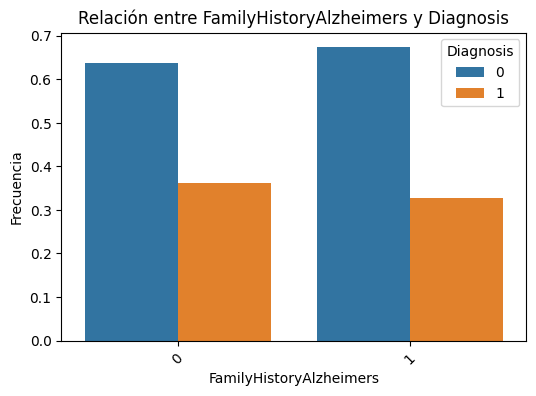

In [40]:
plot_categorical_relationship(df_alzheimer, "FamilyHistoryAlzheimers", "Diagnosis", relative_freq = True)

In [41]:
tabla_contingencia = pd.crosstab(df_alzheimer["FamilyHistoryAlzheimers"], df_alzheimer["Diagnosis"])
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)


Valor Chi-Cuadrado: 2.170309071104257
P-Value: 0.14069795394928386


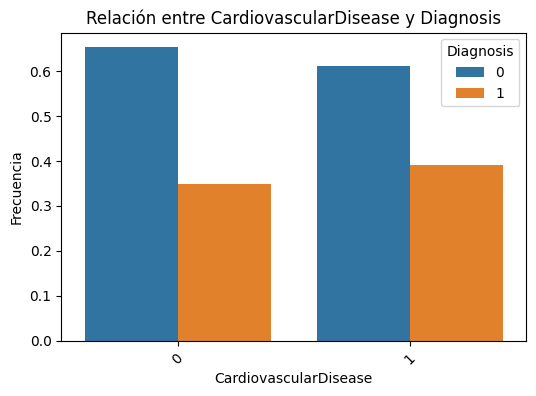

In [42]:
plot_categorical_relationship(df_alzheimer, "CardiovascularDisease", "Diagnosis", relative_freq = True)

In [43]:
tabla_contingencia = pd.crosstab(df_alzheimer["CardiovascularDisease"], df_alzheimer["Diagnosis"])
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)


Valor Chi-Cuadrado: 1.9476831277338071
P-Value: 0.1628367346921118


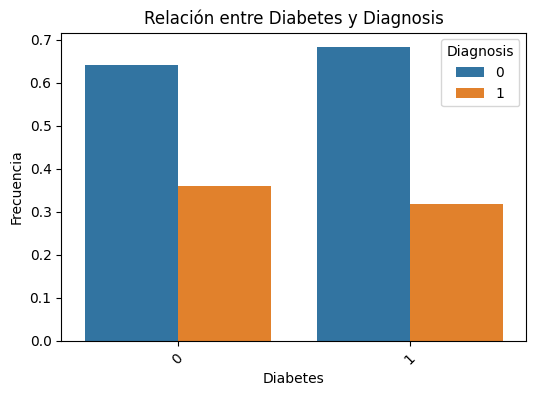

In [44]:
plot_categorical_relationship(df_alzheimer, "Diabetes", "Diagnosis", relative_freq = True)

In [45]:
tabla_contingencia = pd.crosstab(df_alzheimer["Diabetes"], df_alzheimer["Diagnosis"])
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)


Valor Chi-Cuadrado: 1.9531766063941984
P-Value: 0.16224495200138433


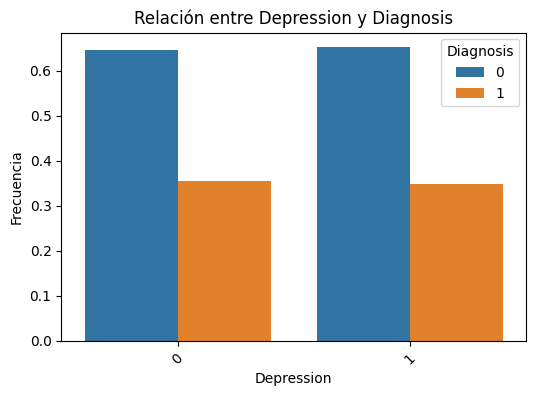

In [46]:
plot_categorical_relationship(df_alzheimer, "Depression", "Diagnosis", relative_freq = True)

In [47]:
tabla_contingencia = pd.crosstab(df_alzheimer["Depression"], df_alzheimer["Diagnosis"])
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)


Valor Chi-Cuadrado: 0.04701930420760714
P-Value: 0.8283335436917469


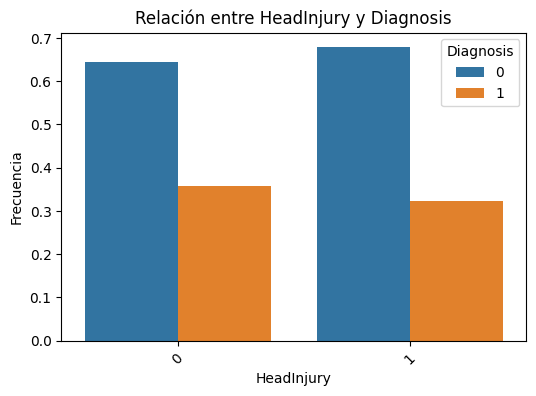

In [48]:
plot_categorical_relationship(df_alzheimer, "HeadInjury", "Diagnosis", relative_freq = True)

In [49]:
tabla_contingencia = pd.crosstab(df_alzheimer["HeadInjury"], df_alzheimer["Diagnosis"])
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)


Valor Chi-Cuadrado: 0.836768271283602
P-Value: 0.3603226855585838


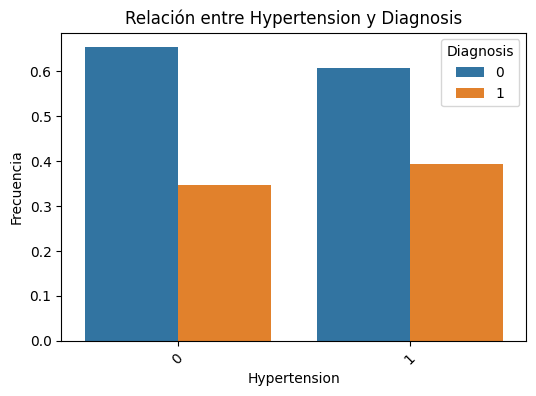

In [50]:
plot_categorical_relationship(df_alzheimer, "Hypertension", "Diagnosis", relative_freq = True)

In [51]:
tabla_contingencia = pd.crosstab(df_alzheimer["Hypertension"], df_alzheimer["Diagnosis"])
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)


Valor Chi-Cuadrado: 2.4424869552087953
P-Value: 0.11808887156379336


Mediciones clínicas:

* MAP: Siguen la misma distribución normal ambos grupos.
* Colesterol: Ambos grupos tienen una distribución uniforme.

No se hayan grandes diferencias en estas mediciones entre los grupos.

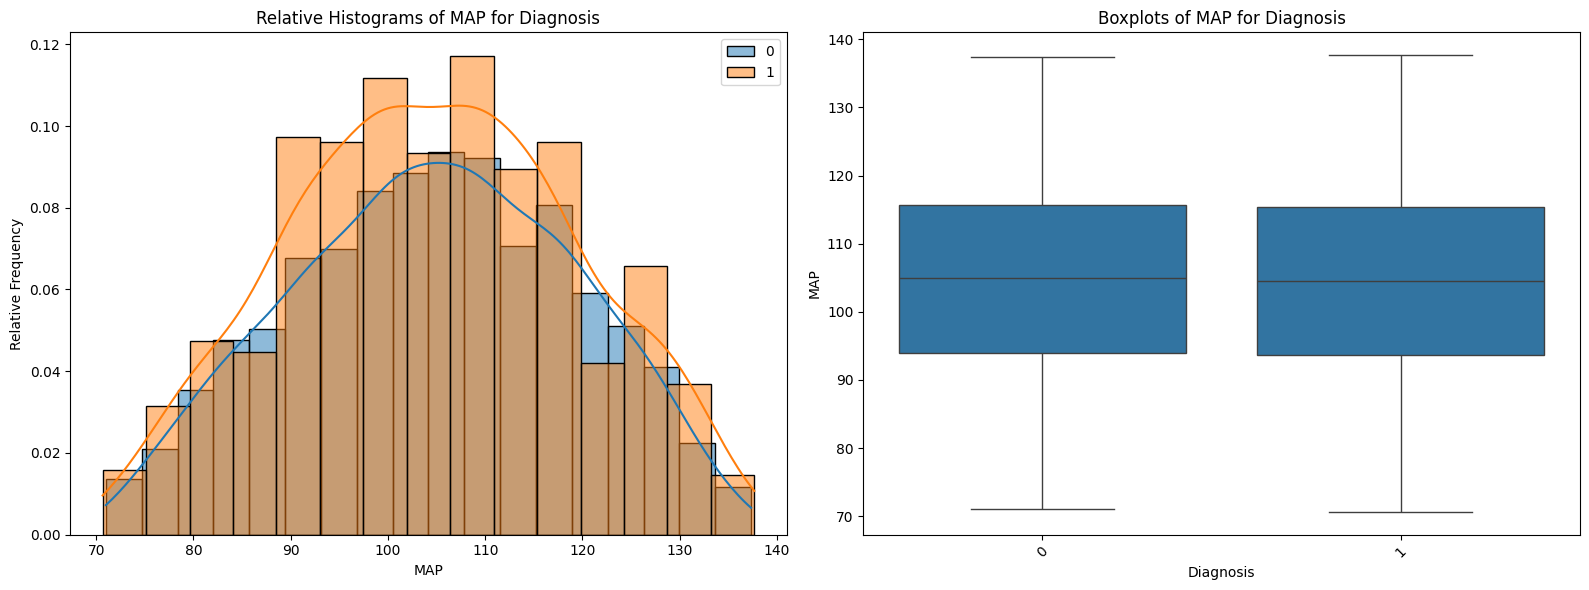

In [52]:
plot_grouped_boxplots_and_histograms_relative(df_alzheimer, "Diagnosis", "MAP", group_size = 2)

In [53]:
grupo_a = df_alzheimer.loc[df_alzheimer.Diagnosis == 0]["MAP"]
grupo_b = df_alzheimer.loc[df_alzheimer.Diagnosis == 1]["MAP"]

u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)


Estadístico U: 533029.5
Valor p: 0.7048564853950605


In [28]:
# se tendría que hacer un t student porque tiene una distribución normal
statistic_t, p_value = ttest_ind(grupo_a, grupo_b)

# Mostrar resultados
print(f"Estadístico t: {statistic_t}")
print(f"P-valor: {p_value}")

Estadístico t: 0.25431181993816804
P-valor: 0.799279022412382


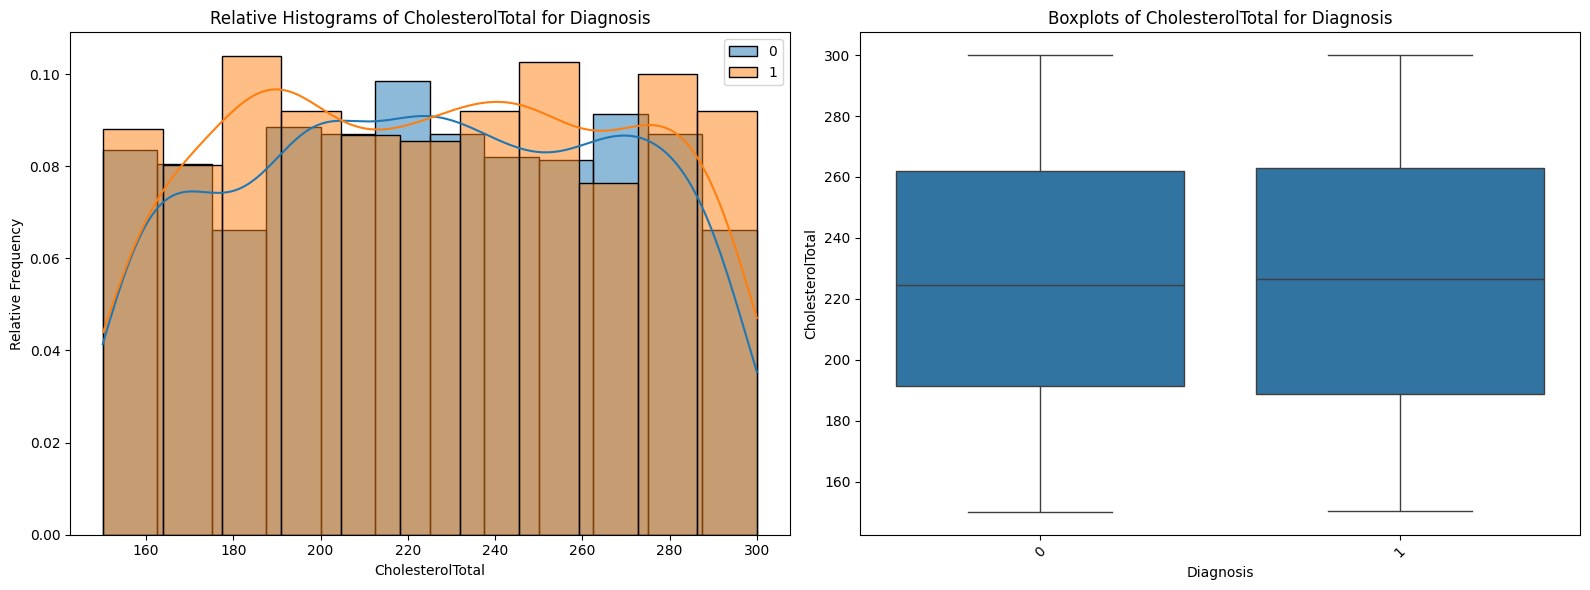

In [54]:
plot_grouped_boxplots_and_histograms_relative(df_alzheimer, "Diagnosis", "CholesterolTotal", group_size = 2)

In [55]:
grupo_a = df_alzheimer.loc[df_alzheimer.Diagnosis == 0]["CholesterolTotal"]
grupo_b = df_alzheimer.loc[df_alzheimer.Diagnosis == 1]["CholesterolTotal"]

u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)


Estadístico U: 524129.0
Valor p: 0.7884313093379731


Evaluaciones cognitivas y funcionales:

* MMSE, se ven grandes diferencias entre ambos grupos. Los diagnosticados con Alzheimer tienden a tener peores resultados que los no diagnosticados.
* La evaluación funcional también presenta grandes diferencias, en los no diagnosticados crece a partir del 5, y en los diagnosticados decrece.
* Sucede lo mismo con las actividades de la vida diaria.
* Las quejas por pérdida de memoria son mucho mayores en personas diagnosticadas de Alzheimer.
* Lo mismo sucede con los problemas en el comportamiento.

Esta categoría de variables demuestran grandes diferencias significativas (p-value<0.05) entre grupos.


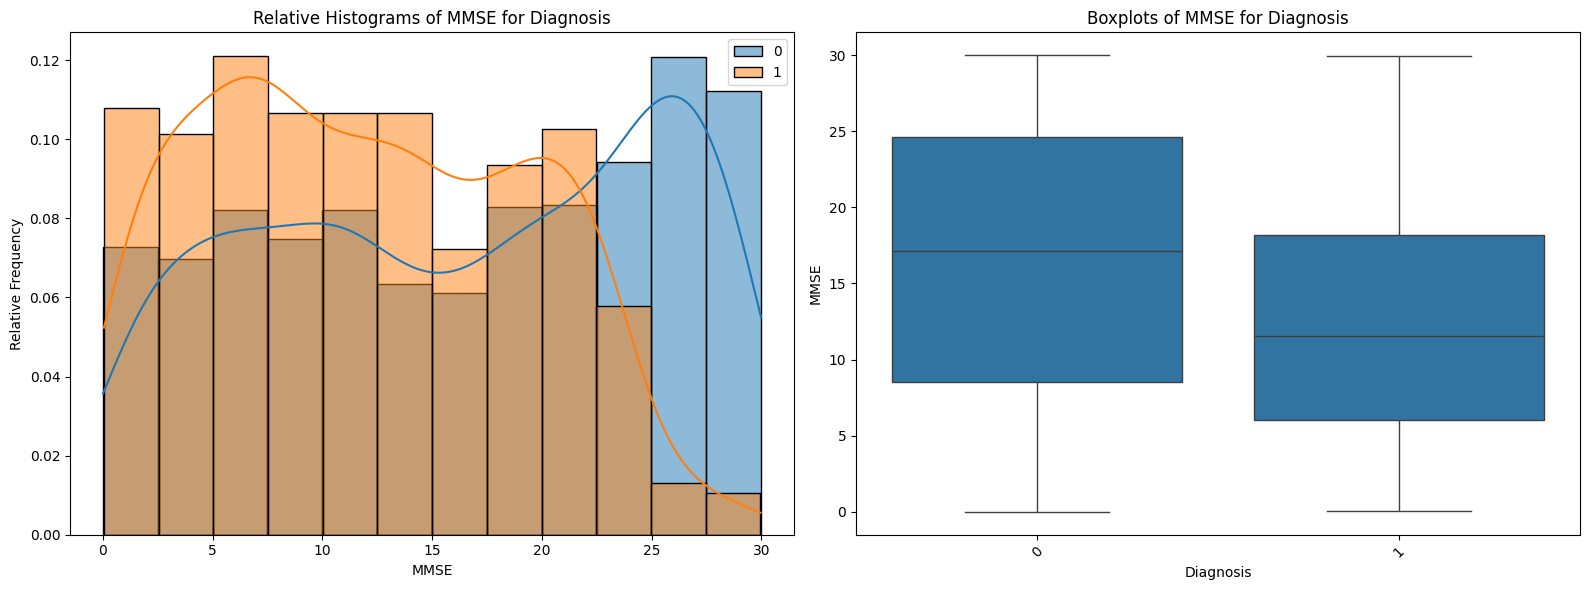

In [56]:
plot_grouped_boxplots_and_histograms_relative(df_alzheimer, "Diagnosis", "MMSE", group_size = 2)

In [57]:
print("La información de los NO diagnosticados sobre MMSE:\n",df_alzheimer_NO["MMSE"].describe(),"\n\n",
      "La información de los SI diagnosticados sobre MMSE:\n", df_alzheimer_SI["MMSE"].describe())

La información de los NO diagnosticados sobre MMSE:
 count    1389.000000
mean       16.265543
std         8.933233
min         0.005312
25%         8.545490
50%        17.145797
75%        24.595710
max        29.991381
Name: MMSE, dtype: float64 

 La información de los SI diagnosticados sobre MMSE:
 count    760.000000
mean      11.994657
std        7.225532
min        0.050624
25%        6.040483
50%       11.565835
75%       18.151993
max       29.959425
Name: MMSE, dtype: float64


In [58]:
grupo_a = df_alzheimer.loc[df_alzheimer.Diagnosis == 0]["MMSE"]
grupo_b = df_alzheimer.loc[df_alzheimer.Diagnosis == 1]["MMSE"]

u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)


Estadístico U: 678416.0
Valor p: 6.623802197153537e-28


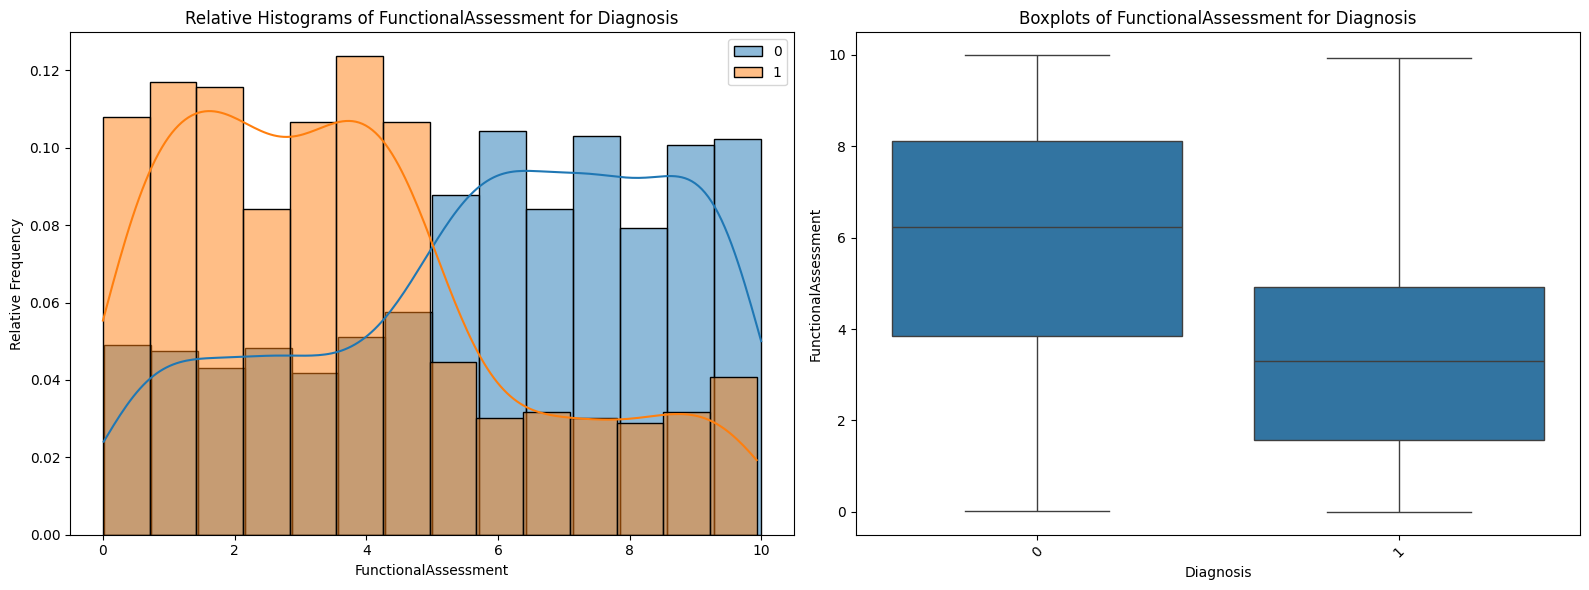

In [59]:
plot_grouped_boxplots_and_histograms_relative(df_alzheimer, "Diagnosis", "FunctionalAssessment", group_size = 2)

In [60]:
print("La información de los NO diagnosticados sobre evaluación funcional es:\n", df_alzheimer_NO["FunctionalAssessment"].describe(),"\n\n",
      "La información de los SI diagnosticados sobre evaluación funcional es:\n", df_alzheimer_SI["FunctionalAssessment"].describe())

La información de los NO diagnosticados sobre evaluación funcional es:
 count    1389.000000
mean        5.860669
std         2.761000
min         0.011898
25%         3.850641
50%         6.244300
75%         8.121256
max         9.996467
Name: FunctionalAssessment, dtype: float64 

 La información de los SI diagnosticados sobre evaluación funcional es:
 count    760.000000
mean       3.653380
std        2.566685
min        0.000460
25%        1.576868
50%        3.299060
75%        4.920710
max        9.927945
Name: FunctionalAssessment, dtype: float64


In [61]:
grupo_a = df_alzheimer.loc[df_alzheimer.Diagnosis == 0]["FunctionalAssessment"]
grupo_b = df_alzheimer.loc[df_alzheimer.Diagnosis == 1]["FunctionalAssessment"]

u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)


Estadístico U: 761542.0
Valor p: 8.997089936392632e-65


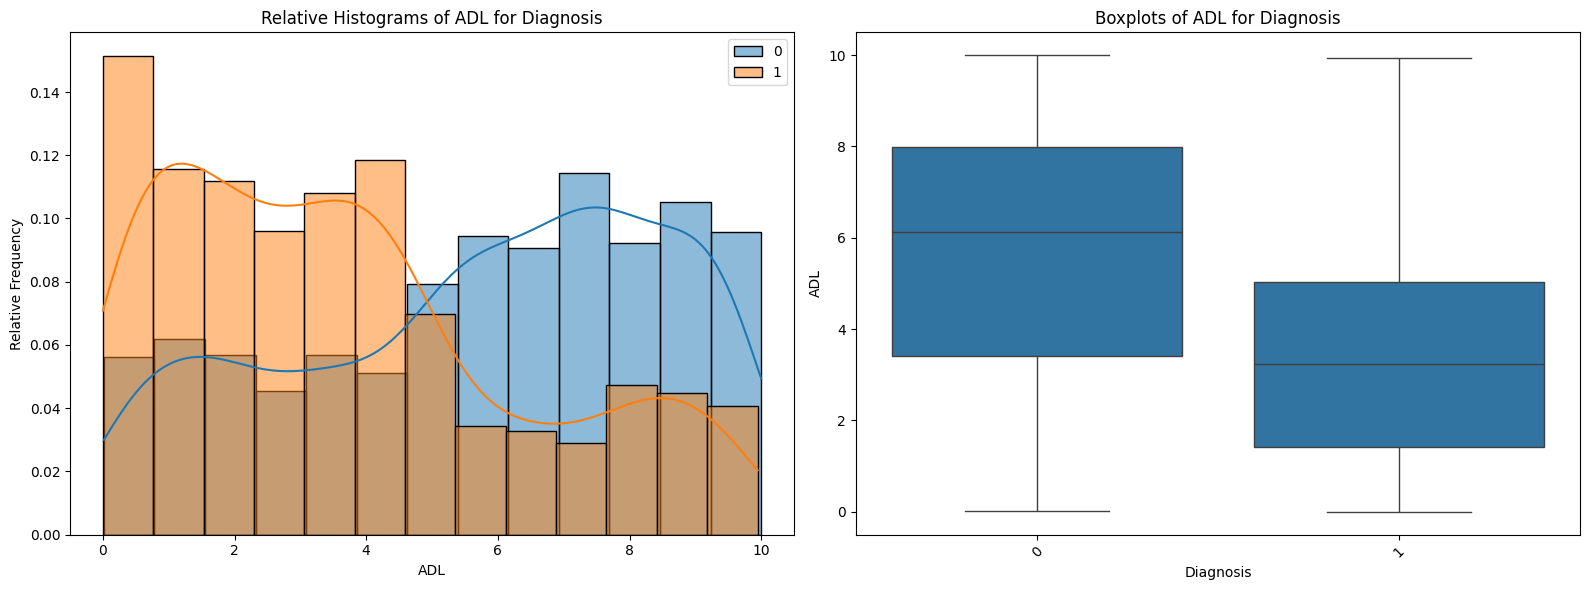

In [62]:
plot_grouped_boxplots_and_histograms_relative(df_alzheimer, "Diagnosis", "ADL", group_size = 2)

In [63]:
print("La información de los NO diagnosticados sobre ADL es:\n", df_alzheimer_NO["ADL"].describe(),"\n\n",
      "La información de los SI diagnosticados sobre ADL:\n", df_alzheimer_SI["ADL"].describe())

La información de los NO diagnosticados sobre ADL es:
 count    1389.000000
mean        5.707951
std         2.826502
min         0.014691
25%         3.402695
50%         6.135120
75%         7.998984
max         9.999747
Name: ADL, dtype: float64 

 La información de los SI diagnosticados sobre ADL:
 count    760.000000
mean       3.657938
std        2.700909
min        0.001288
25%        1.425180
50%        3.235750
75%        5.026479
max        9.945036
Name: ADL, dtype: float64


In [64]:
grupo_a = df_alzheimer.loc[df_alzheimer.Diagnosis == 0]["ADL"]
grupo_b = df_alzheimer.loc[df_alzheimer.Diagnosis == 1]["ADL"]

u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)


Estadístico U: 738445.0
Valor p: 6.053564177610969e-53


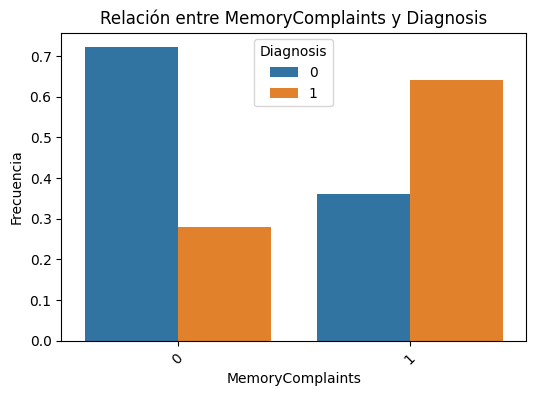

In [65]:
plot_categorical_relationship(df_alzheimer, "MemoryComplaints", "Diagnosis", relative_freq = True)

In [66]:

tabla_contingencia = pd.crosstab(df_alzheimer["MemoryComplaints"], df_alzheimer["Diagnosis"])
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)

Valor Chi-Cuadrado: 200.62370423042574
P-Value: 1.5266050985264054e-45


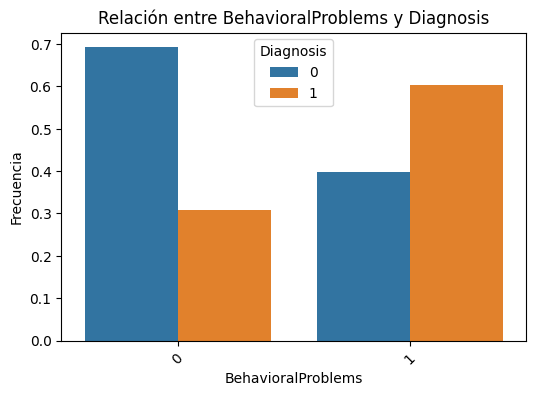

In [67]:
plot_categorical_relationship(df_alzheimer, "BehavioralProblems", "Diagnosis", relative_freq = True)

In [68]:

tabla_contingencia = pd.crosstab(df_alzheimer["BehavioralProblems"], df_alzheimer["Diagnosis"])
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)

Valor Chi-Cuadrado: 106.8792165385845
P-Value: 4.731446795211873e-25


Síntomas:

* La confusión no parece ser diferente entre los dos grupos.
* La desorientación no parece ser diferente entre los dos grupos.
* Los cambios de personalidad no parecen ser diferentes entre los dos grupos.
* La dificultad en hacer tareas no parece ser diferente entre los dos grupos.
* El olvido no parece ser diferente entre los dos grupos.

Los síntomas no muestran grandes diferencias entre ambos grupos. Puede que sean por la edad o por la autopercepción de cada paciente.

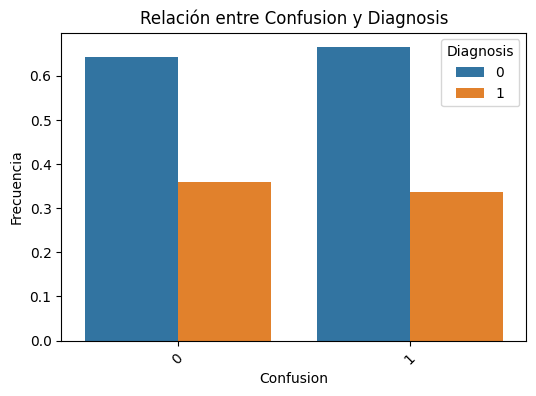

In [69]:
plot_categorical_relationship(df_alzheimer, "Confusion", "Diagnosis", relative_freq = True)

In [70]:

tabla_contingencia = pd.crosstab(df_alzheimer["Confusion"], df_alzheimer["Diagnosis"])
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)

Valor Chi-Cuadrado: 0.6947855762350034
P-Value: 0.4045413830124688


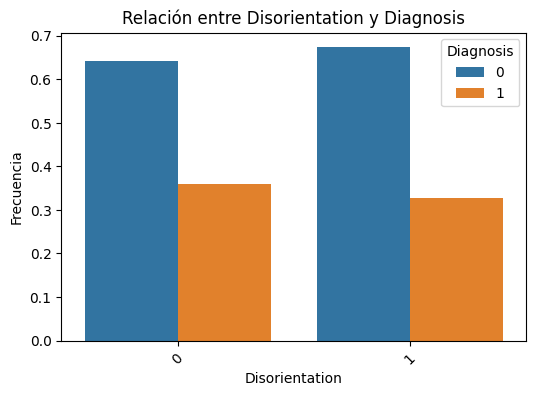

In [71]:
plot_categorical_relationship(df_alzheimer, "Disorientation", "Diagnosis", relative_freq = True)

In [72]:

tabla_contingencia = pd.crosstab(df_alzheimer["Disorientation"], df_alzheimer["Diagnosis"])
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)

Valor Chi-Cuadrado: 1.168139870214583
P-Value: 0.27978377696750084


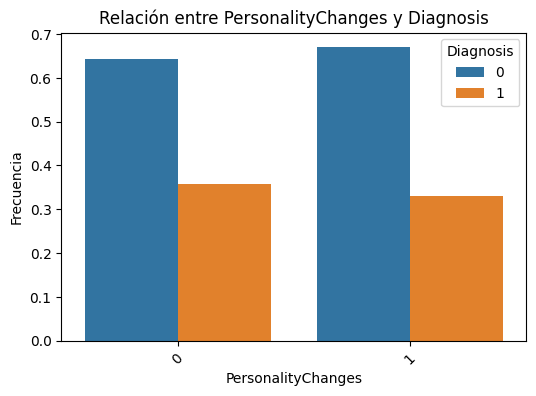

In [73]:
plot_categorical_relationship(df_alzheimer, "PersonalityChanges", "Diagnosis", relative_freq = True)

In [74]:

tabla_contingencia = pd.crosstab(df_alzheimer["PersonalityChanges"], df_alzheimer["Diagnosis"])
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)

Valor Chi-Cuadrado: 0.7977827910613255
P-Value: 0.37175710638032144


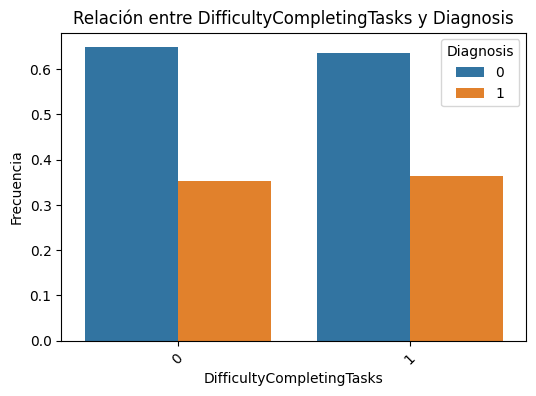

In [75]:
plot_categorical_relationship(df_alzheimer, "DifficultyCompletingTasks", "Diagnosis", relative_freq = True)

In [76]:

tabla_contingencia = pd.crosstab(df_alzheimer["DifficultyCompletingTasks"], df_alzheimer["Diagnosis"])
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)

Valor Chi-Cuadrado: 0.1286310225412865
P-Value: 0.7198556855473033


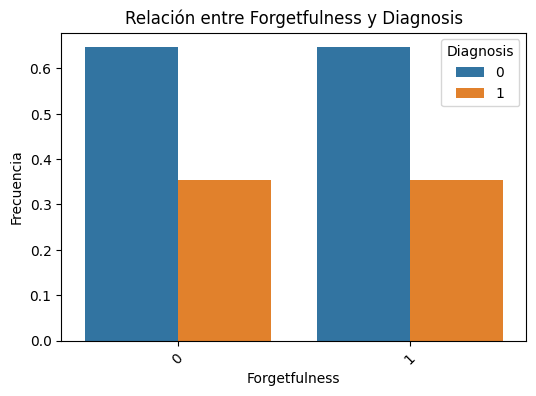

In [77]:
plot_categorical_relationship(df_alzheimer, "Forgetfulness", "Diagnosis", relative_freq = True)

In [78]:

tabla_contingencia = pd.crosstab(df_alzheimer["Forgetfulness"], df_alzheimer["Diagnosis"])
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)

Valor Chi-Cuadrado: 0.0
P-Value: 1.0


Se prueba si los síntomas tuvieran que ver más con la edad.

* No se hallan relaciones significativas de los síntomas con la edad.

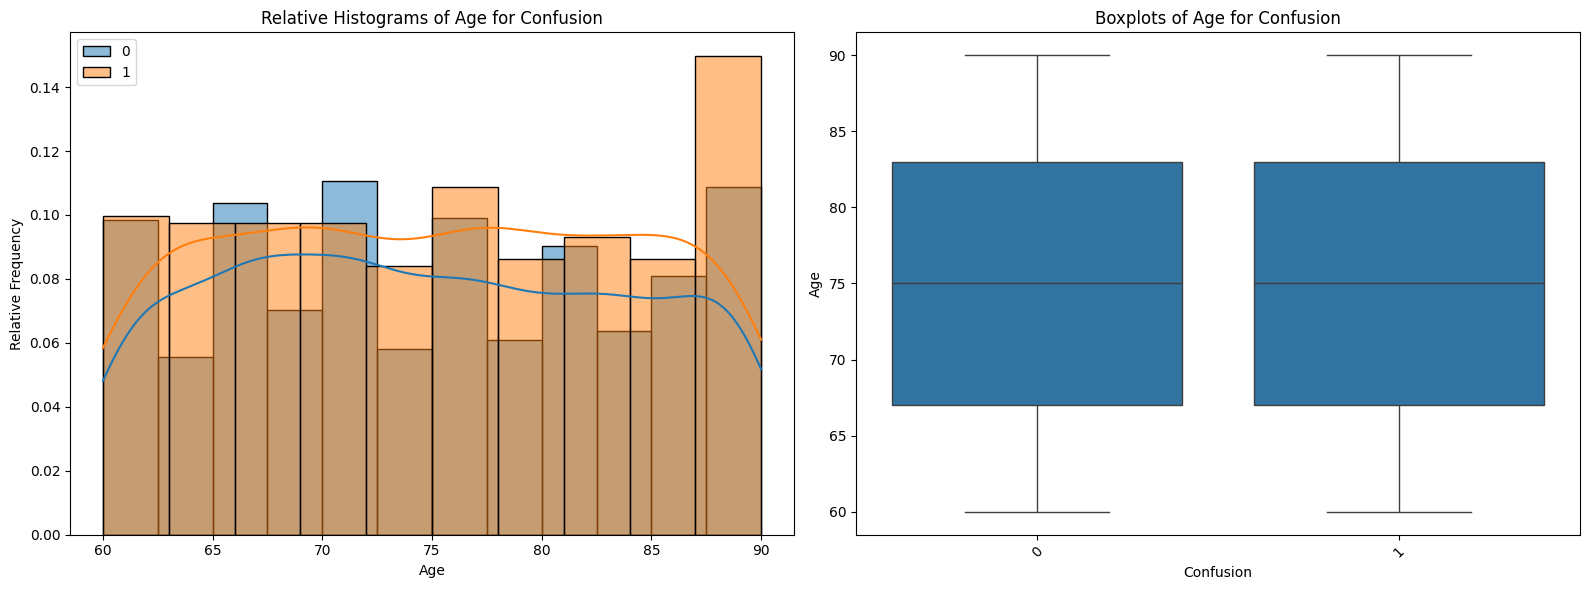

In [79]:
plot_grouped_boxplots_and_histograms_relative(df_alzheimer, "Confusion", "Age", group_size = 2)

In [80]:
grupo_a = df_alzheimer.loc[df_alzheimer.Confusion == 0]["Age"]
grupo_b = df_alzheimer.loc[df_alzheimer.Confusion == 1]["Age"]

u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 371848.0
Valor p: 0.6814807657374952


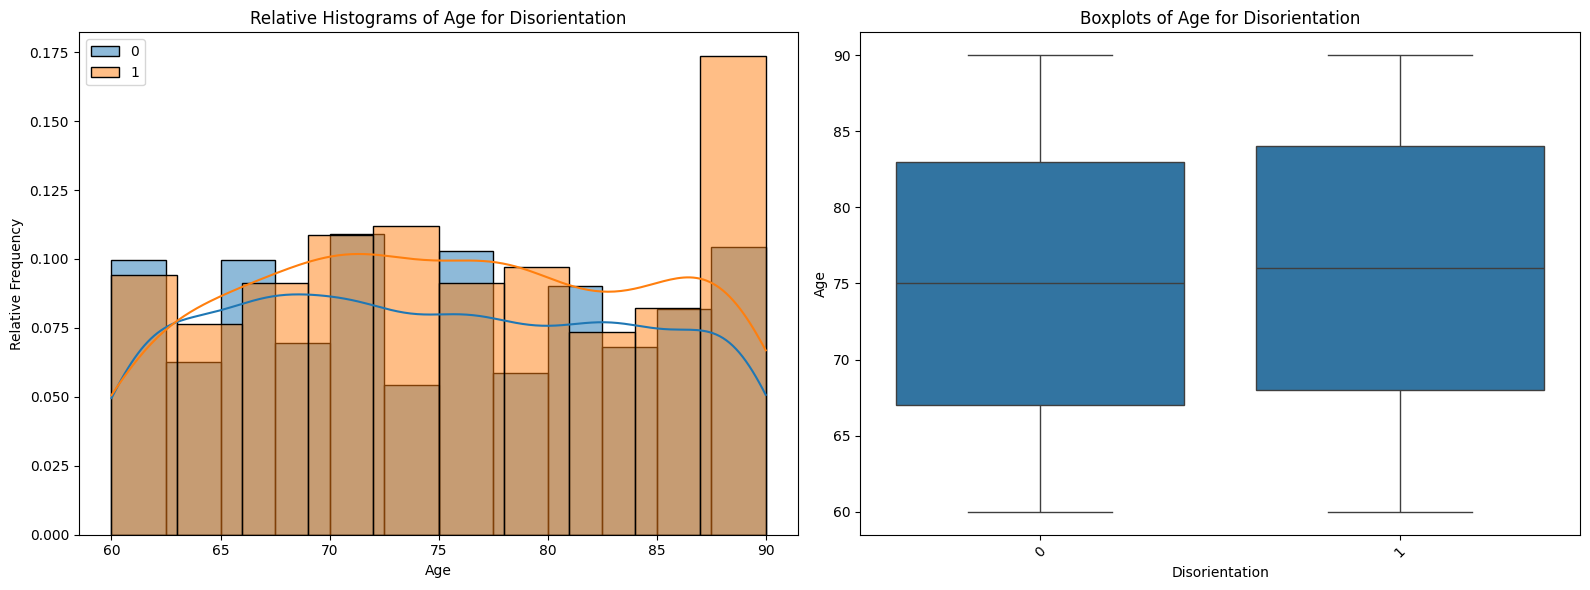

In [81]:
plot_grouped_boxplots_and_histograms_relative(df_alzheimer, "Disorientation", "Age", group_size = 2)

In [82]:
grupo_a = df_alzheimer.loc[df_alzheimer.Disorientation == 0]["Age"]
grupo_b = df_alzheimer.loc[df_alzheimer.Disorientation == 1]["Age"]

u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 293994.0
Valor p: 0.1970157918279989


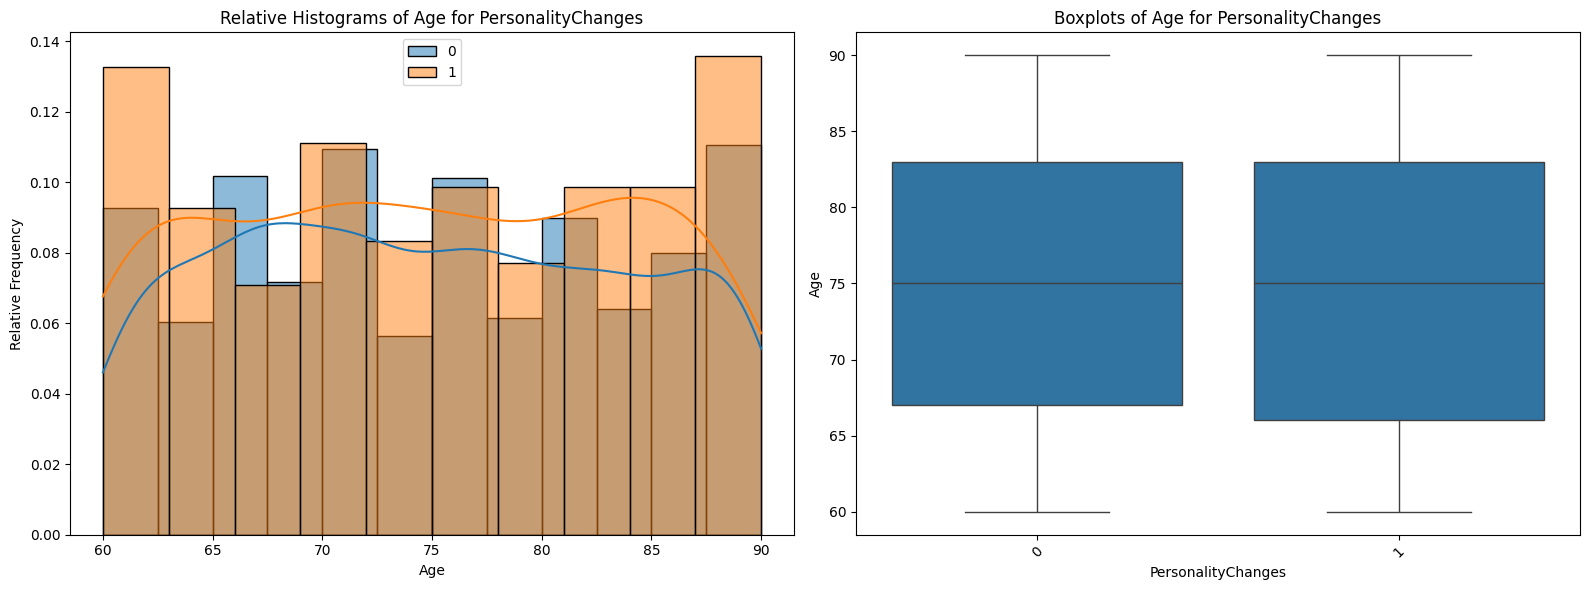

In [83]:
plot_grouped_boxplots_and_histograms_relative(df_alzheimer, "PersonalityChanges", "Age", group_size = 2)

In [84]:
grupo_a = df_alzheimer.loc[df_alzheimer.PersonalityChanges == 0]["Age"]
grupo_b = df_alzheimer.loc[df_alzheimer.PersonalityChanges == 1]["Age"]

u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 300380.0
Valor p: 0.645697568242598


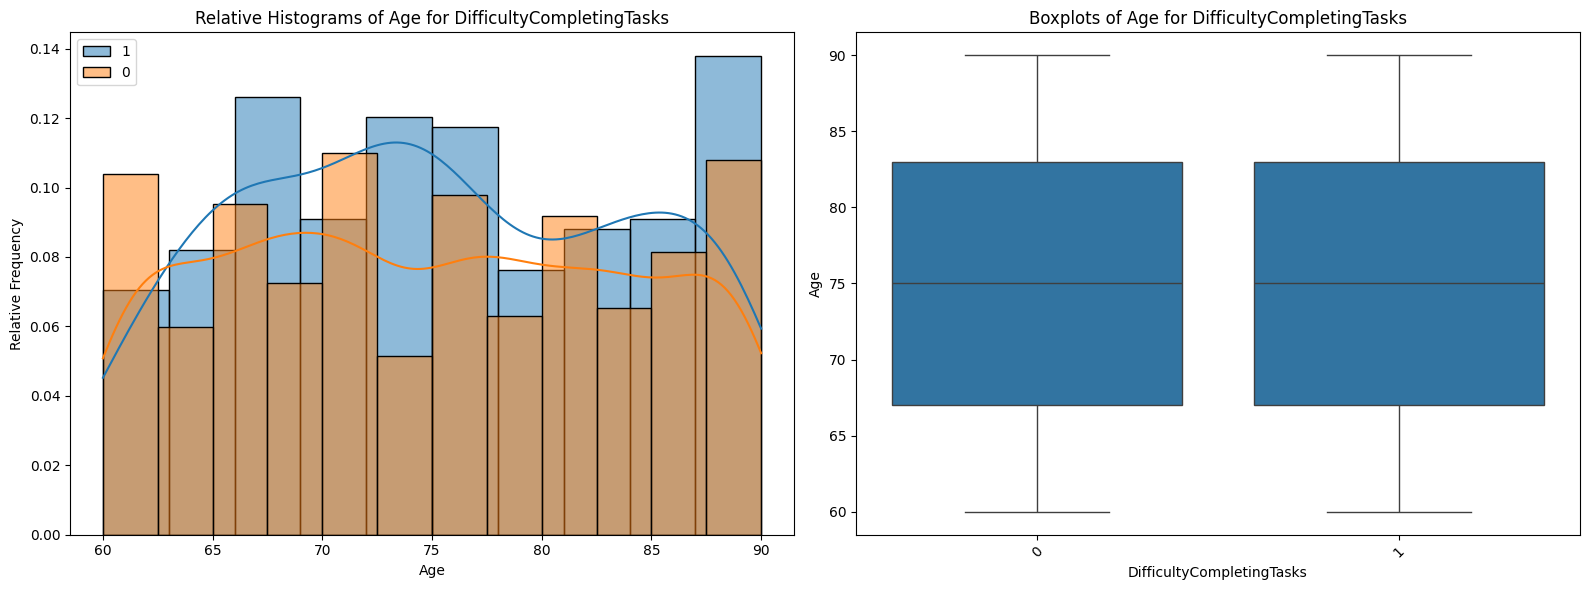

In [85]:
plot_grouped_boxplots_and_histograms_relative(df_alzheimer, "DifficultyCompletingTasks", "Age", group_size = 2)

In [86]:
grupo_a = df_alzheimer.loc[df_alzheimer.DifficultyCompletingTasks == 0]["Age"]
grupo_b = df_alzheimer.loc[df_alzheimer.DifficultyCompletingTasks == 1]["Age"]

u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 301453.0
Valor p: 0.5167576005092531


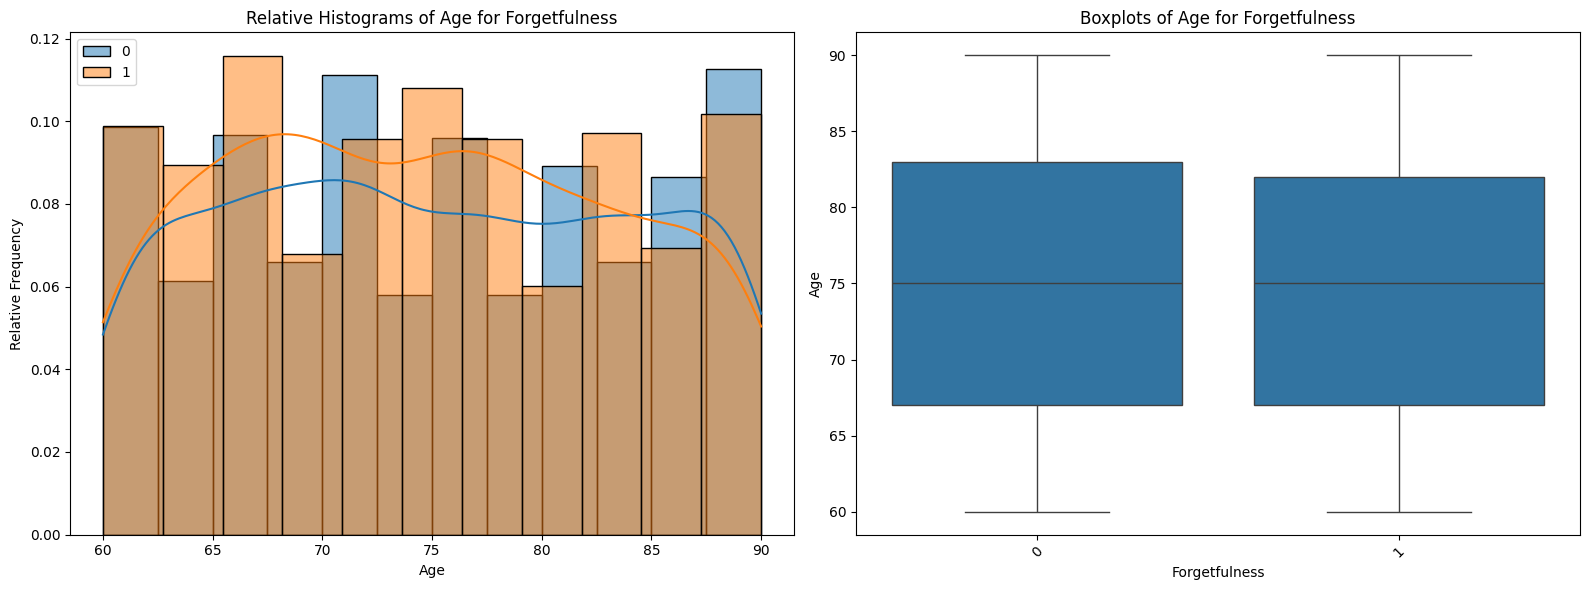

In [87]:
plot_grouped_boxplots_and_histograms_relative(df_alzheimer, "Forgetfulness", "Age", group_size = 2)

In [88]:
grupo_a = df_alzheimer.loc[df_alzheimer.Forgetfulness == 0]["Age"]
grupo_b = df_alzheimer.loc[df_alzheimer.Forgetfulness == 1]["Age"]

u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 498054.5
Valor p: 0.373974080747299


##### Análisis multivariante

Ver la relación de todas las variables entre sí.

Como se puede ver en el heatmap, las que tienen más relación entre sí son las evaluaciones cognitivas y funcionales.

In [30]:
corr_matrix = df_alzheimer.corr(numeric_only = True) # Si no lo pones y tienes variables tipo texto, fallará7
corr_matrix

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,MAP
Age,1.000000,0.028708,0.027745,-0.060560,-0.015677,0.020060,0.007323,-0.010249,-0.023386,0.049139,...,0.012343,0.038973,-0.038658,0.009002,0.027523,-0.009470,0.013900,-0.019279,-0.005488,-0.006743
Gender,0.028708,1.000000,-0.003660,-0.007070,0.005928,0.016650,0.004330,-0.035795,0.010942,0.007310,...,0.003880,0.006099,0.003865,-0.030583,0.017506,0.025919,-0.001636,-0.028537,-0.020975,-0.014036
Ethnicity,0.027745,-0.003660,1.000000,0.026516,-0.003176,0.031485,0.008363,0.020498,-0.018184,0.029304,...,0.003687,-0.019363,0.010475,0.022431,-0.018132,-0.030035,0.019363,-0.034619,-0.014782,-0.007770
EducationLevel,-0.060560,-0.007070,0.026516,1.000000,-0.023514,-0.009904,-0.012646,-0.016703,0.017412,0.020248,...,-0.000165,0.010473,0.031934,-0.008168,-0.017568,-0.019950,0.013033,-0.008685,-0.043966,-0.012001
BMI,-0.015677,0.005928,-0.003176,-0.023514,1.000000,0.020437,-0.008997,0.000742,0.019922,-0.005975,...,0.029293,0.035276,-0.009788,-0.015859,-0.031840,-0.015901,-0.039400,0.071131,0.026343,-0.013455
Smoking,0.020060,0.016650,0.031485,-0.009904,0.020437,1.000000,0.008363,0.010760,-0.002048,-0.001145,...,0.020339,-0.014763,-0.029233,0.004498,-0.028403,-0.009977,0.001741,0.018011,-0.004865,-0.025639
AlcoholConsumption,0.007323,0.004330,0.008363,-0.012646,-0.008997,0.008363,1.000000,0.021696,0.020117,-0.003873,...,-0.029418,0.013657,-0.008250,-0.032798,0.015521,0.019117,-0.002712,-0.024121,-0.007618,-0.024987
PhysicalActivity,-0.010249,-0.035795,0.020498,-0.016703,0.000742,0.010760,0.021696,1.000000,0.011085,-0.001823,...,0.008709,-0.014253,-0.013324,-0.009397,-0.020407,-0.013629,0.031169,0.009837,0.005945,-0.011336
DietQuality,-0.023386,0.010942,-0.018184,0.017412,0.019922,-0.002048,0.020117,0.011085,1.000000,0.051295,...,0.012537,-0.014033,-0.007888,0.002628,-0.026271,0.029087,0.045737,0.006175,0.008506,0.011243
SleepQuality,0.049139,0.007310,0.029304,0.020248,-0.005975,-0.001145,-0.003873,-0.001823,0.051295,1.000000,...,-0.016807,-0.019899,0.014535,0.013508,0.019467,-0.016892,0.011237,0.002930,-0.056548,-0.007853


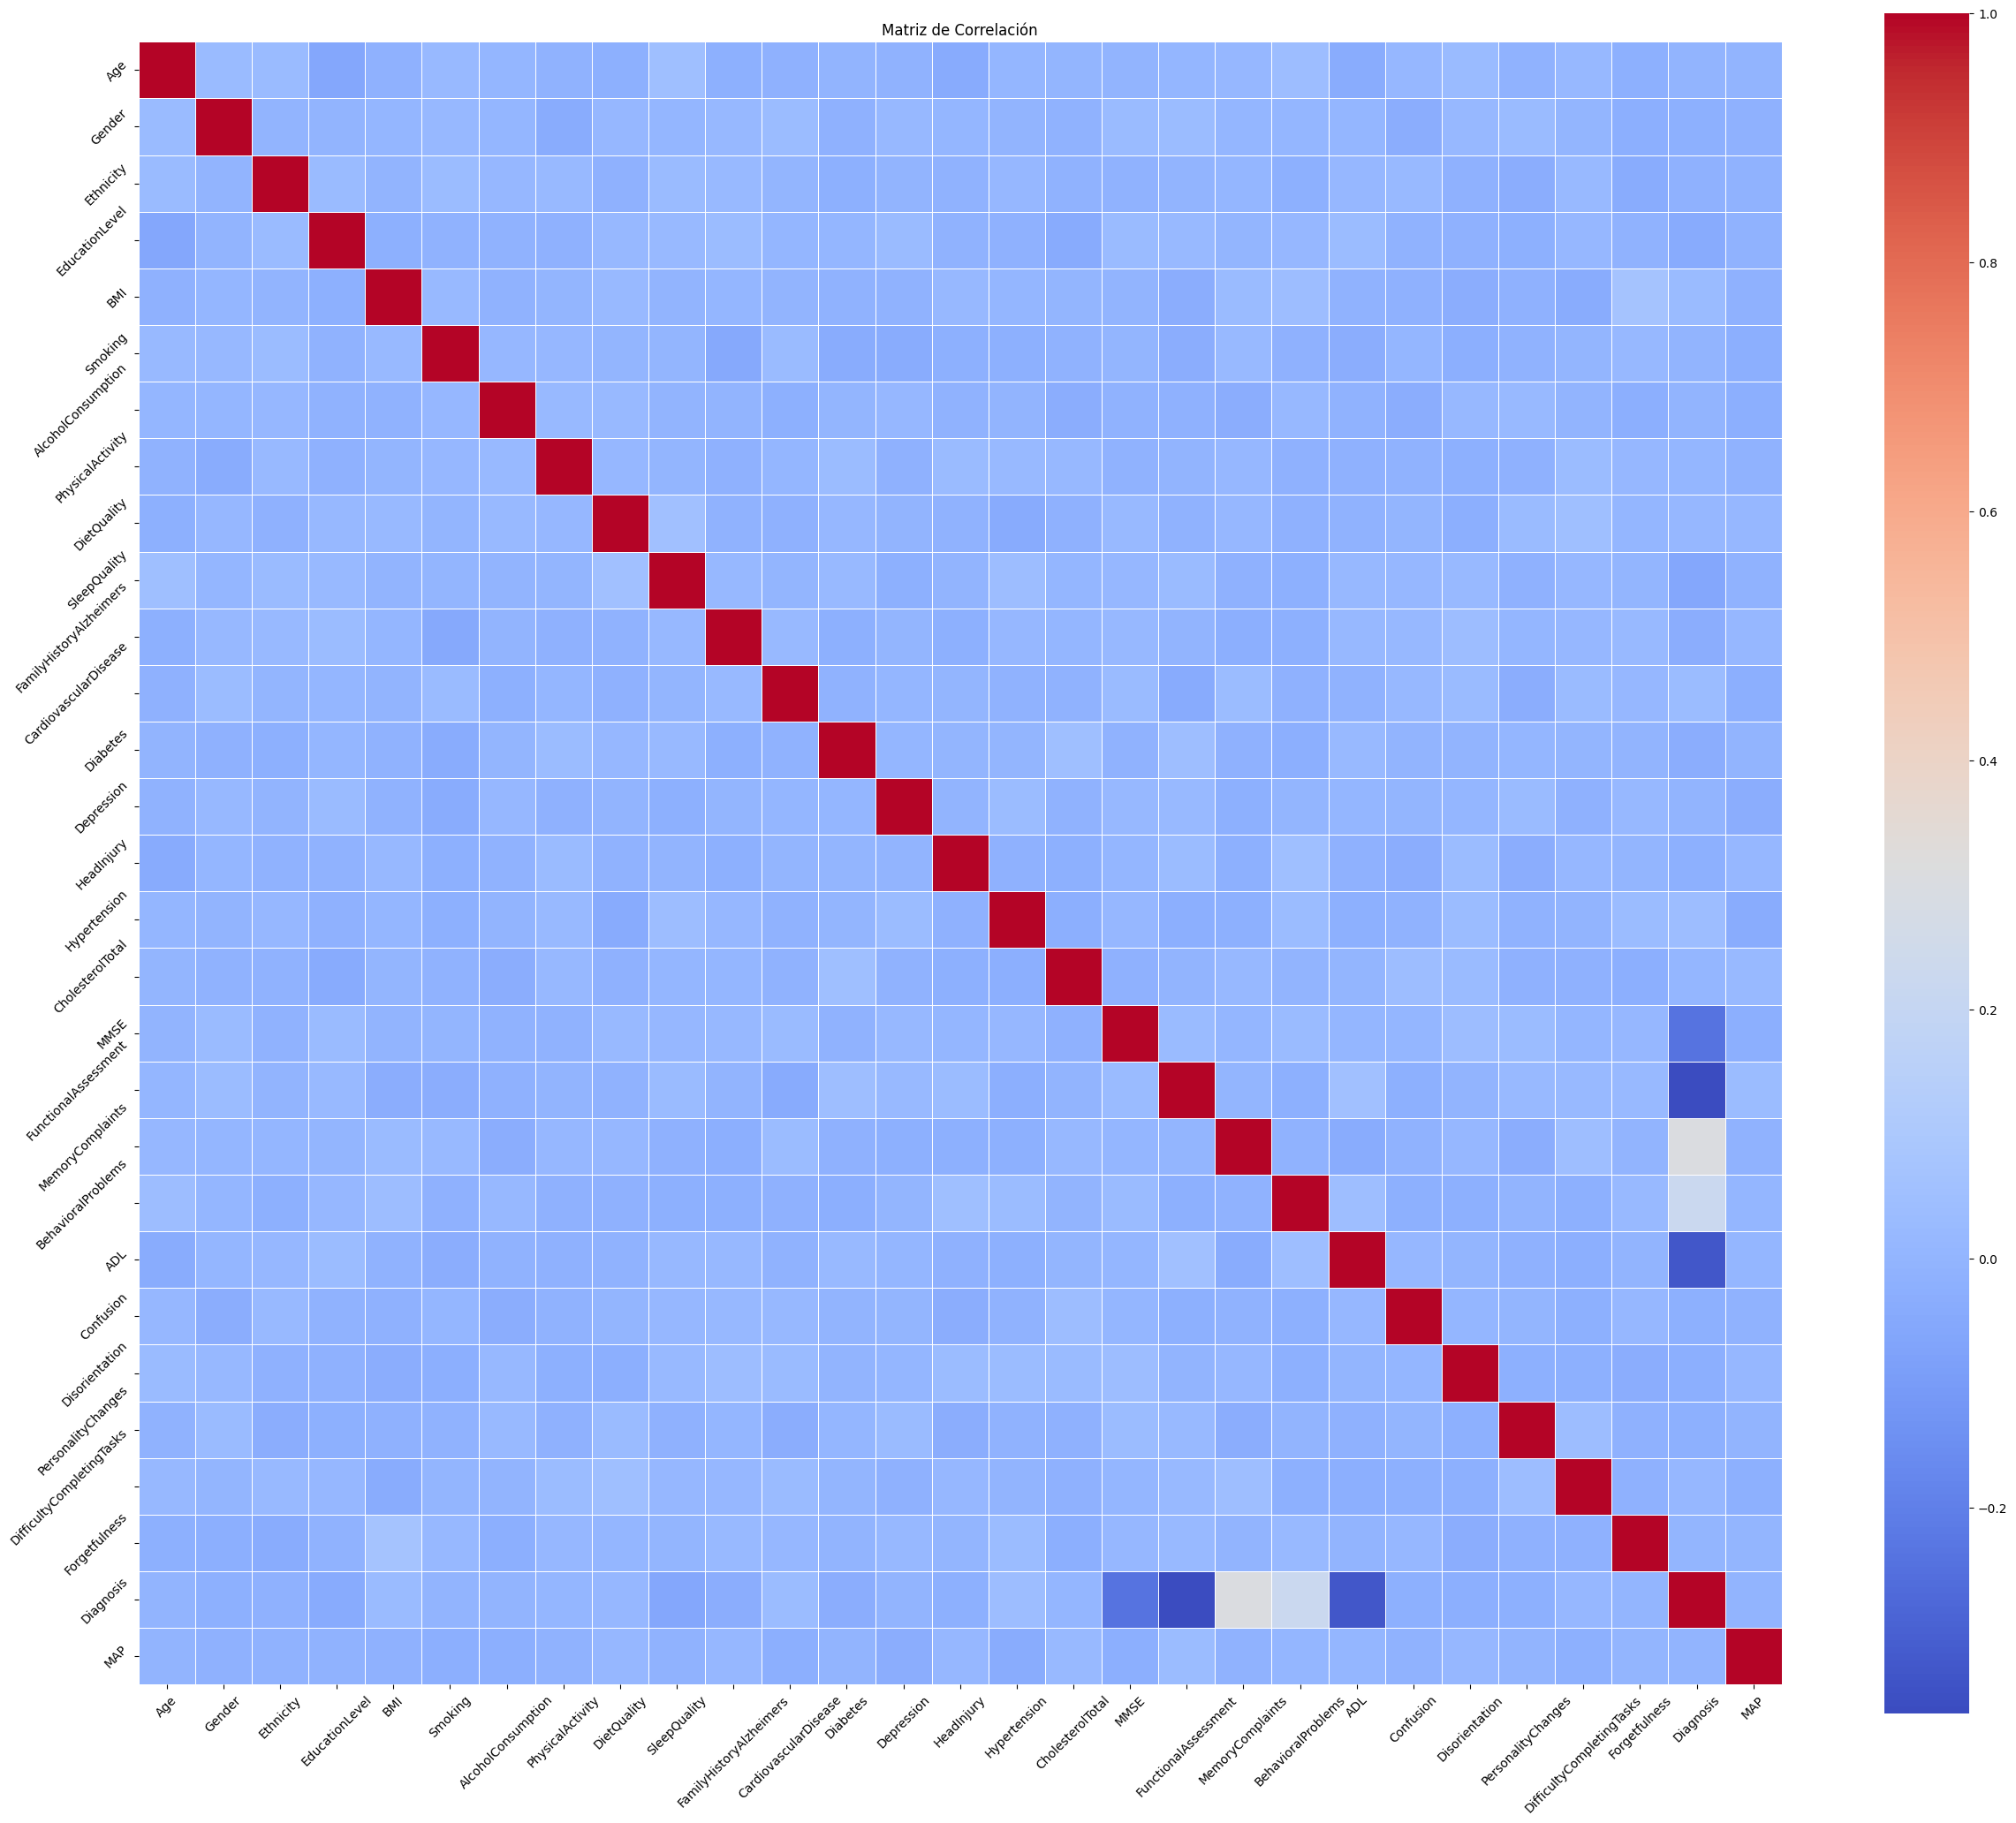

In [90]:
plt.figure(figsize=(30, 25))  
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap="coolwarm", 
            cbar=True, square=True, linewidths=.5) 
plt.title('Matriz de Correlación')
plt.xticks(rotation=45)  # Rota las etiquetas de las x si es necesario
plt.yticks(rotation=45)  # Rota las etiquetas de las y si es necesario

plt.show()

##### 5. Resultados

**Contraste con hipótesis**

El objetivo del EDA es observar que variables son las que más influyen en los pacientes diagnosticados de Alzheimer y hallar posibles relaciones entre ellas. Viendo el resultado, podríamos saber que se puede tener en cuenta a la hora de diagnosticar/tratar un paciente con esta enfermedad.

1. **Hipótesis 1**: ¿hay alguna tendencia en los datos demográficos en los pacientes de Alzheimer? Sobre todo podría ser la edad o, incluso nivel educacional. 

> No se han hallado relaciones significativas en ninguna de las variables demográficas, por lo que se entiende que estas no influyen en el desarrollo del Alzheimer.

2. **Hipótesis 2**: ¿el estilo de vida influye en el desarrollo de Alzheimer?

> La variable que tiene relación significativa con el diagnóstico de Alzheimer es la calidad del sueño, por lo que las personas enfermas normalmente tendrán peor calidad del sueño que las que no. 

3. **Hipótesis 3**: ¿los datos del historial médico influyen en el desarrollo de Alzheimer?

> Las variables del historial médico no tenían relación significativa con el desarrollo del Alzheimer.

4. **Hipótesis 4**: ¿las mediciones clínicas son diferentes si padeces la enfermedad? ¿y las evaluaciones cognitivas? Se puede ver que ayuda más al diagnóstico.

> Las mediciones clínicas no tenían relación significativa con el Alzheimer, en cambio, las evaluaciones y cognitivas y funcinoales sí, todas ellas, por lo que serían la solución óptima para el diagnóstico de esta enfermedad.

5. **Hipótesis 5**: ¿están estos síntomas relacionados con el Alzheimer?

> No tienen relación significativa. Se probó si tenían relación con la edad, puesto que todo son personas mayores, pero tampoco era así. No se podría relacionar directamente los síntomas que aparecen con la enfermedad.

Por lo que, con todo ello, las variables significativas que tienen relación con el diagnóstico del Alzheimer son: calidad del sueño, MMSE, evaluación funcional, quejas de memoria, problemas de comportamiento y actividades de la vida diaria.


**Plan de acción**

Con esta información, se puede investigar más sobre la influencia de la calidad del sueño en estos pacientes, y ver si pudiera ser una variable predictiva y/o preventiva. Se podría invertir en dispositivos que ayuden a monitorizarlo e incluso sistemas que ayuden a mejorarlo si es que tiene consecuencias positivas realmente. 

Por parte de las evaluaciones cognitivas y funcionales, se ha visto que son buenos medidores de si un paciente tiene esta enfermedad o no, por lo que son interesantes de cara al diagnóstico. Se han de estudiar bien y ser bien aplicadas. Hay que profundizar más en ellas.

**Conclusiones**

Con todo esto, se han contestado las hipótesis iniciales mediante datos y gráficas del dataset. A partir de este EDA, se puede tener una idea más clara de las variables que se miden a la hora de diagnosticar Alzheimer a los pacientes y las que son realmente significativas para ello. Se abre un posible campo futuro mediante el análisis en la calidad del sueño, y se anima a seguir buscando variables que ayuden, junto a las valoraciones y a las pruebas de imagen médica, al diagnóstico temprano y prevención del Alzheimer.